# BE Final Project: House Price Pridection

## 1. Data Preprocessing

### 1.1 Importing Required Liberaries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, confusion_matrix
from sklearn import metrics

### 1.2 Data Acquisition and DataFrame Creation

In [2]:
df = pd.read_csv('../CSV/India.csv', index_col=False)

### 1.3 Data Evaluation

In [3]:
df.head()

,Price,Area,City,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,Banglore,JP Nagar Phase 1,4,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Banglore,Dasarahalli on Tumkur Road,2,0,0,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Banglore,Kannur on Thanisandra Main Road,2,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Banglore,Doddanekundi,3,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Banglore,Kengeri,3,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [4]:
df.size

413813

In [5]:
df.shape

(10093, 41)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10093 entries, 0 to 10092
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                10093 non-null  int64 
 1   Area                 10093 non-null  int64 
 2   City                 10093 non-null  object
 3   Location             10093 non-null  object
 4   No. of Bedrooms      10093 non-null  int64 
 5   Resale               10093 non-null  int64 
 6   MaintenanceStaff     10093 non-null  int64 
 7   Gymnasium            10093 non-null  int64 
 8   SwimmingPool         10093 non-null  int64 
 9   LandscapedGardens    10093 non-null  int64 
 10  JoggingTrack         10093 non-null  int64 
 11  RainWaterHarvesting  10093 non-null  int64 
 12  IndoorGames          10093 non-null  int64 
 13  ShoppingMall         10093 non-null  int64 
 14  Intercom             10093 non-null  int64 
 15  SportsFacility       10093 non-null  int64 
 16  ATM 

In [7]:
df.columns

Index(['Price', 'Area', 'City', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')

### 1.4 Data Insights

In [8]:
df.isnull().sum()

Price                  0
Area                   0
City                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0


In [9]:
df.describe()['Wardrobe']

count    10093.000000
mean         0.020906
std          0.143075
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Wardrobe, dtype: float64

In [10]:
#Corelation without considerating LOCATION.
df.corr()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
Price,1.000000,0.652585,0.439123,0.128312,0.088580,0.140537,0.156452,0.123177,0.101692,0.134042,...,0.073478,0.112406,0.060695,0.098230,0.065167,0.103201,0.089542,0.099936,0.125293,0.107972
Area,0.652585,1.000000,0.729552,-0.003146,-0.011789,0.276395,0.315745,0.234055,0.255538,0.200987,...,0.122343,0.039565,0.152859,0.129399,0.061354,0.091985,0.105422,0.113188,0.044020,0.107304
No. of Bedrooms,0.439123,0.729552,1.000000,0.003044,-0.096969,0.133460,0.181079,0.121685,0.132476,0.069604,...,0.105624,-0.016500,0.081532,0.093558,0.017765,0.070671,0.080242,0.074601,0.011868,0.079399
Resale,0.128312,-0.003146,0.003044,1.000000,0.263689,-0.154323,-0.226471,-0.137831,-0.173717,-0.016485,...,0.012941,0.185955,0.008700,-0.019580,-0.049791,0.014443,-0.014219,0.021793,0.165969,-0.010177
MaintenanceStaff,0.088580,-0.011789,-0.096969,0.263689,1.000000,0.137828,0.068617,0.191619,0.165869,0.323851,...,0.127789,0.229347,0.220419,-0.013074,0.144741,0.023459,-0.022006,-0.011499,0.116114,-0.016042
Gymnasium,0.140537,0.276395,0.133460,-0.154323,0.137828,1.000000,0.759187,0.579740,0.632427,0.481850,...,0.370044,0.125762,0.366469,0.108146,0.139806,0.069991,0.120670,0.138322,-0.026172,0.105718
SwimmingPool,0.156452,0.315745,0.181079,-0.226471,0.068617,0.759187,1.000000,0.631171,0.689844,0.528043,...,0.316413,0.008856,0.424854,0.143260,0.168128,0.090592,0.153211,0.158897,-0.007804,0.138983
LandscapedGardens,0.123177,0.234055,0.121685,-0.137831,0.191619,0.579740,0.631171,1.000000,0.680713,0.584829,...,0.277480,0.012441,0.444660,0.077888,0.181454,0.040081,0.087720,0.105500,0.028112,0.083611
JoggingTrack,0.101692,0.255538,0.132476,-0.173717,0.165869,0.632427,0.689844,0.680713,1.000000,0.613809,...,0.249307,-0.036021,0.537587,0.070686,0.194235,0.035794,0.066486,0.070444,-0.025454,0.070440
RainWaterHarvesting,0.134042,0.200987,0.069604,-0.016485,0.323851,0.481850,0.528043,0.584829,0.613809,1.000000,...,0.285845,-0.018498,0.556846,0.032923,0.149614,0.050880,0.036226,0.045810,0.062362,0.042029


Text(0.5, 1.0, 'Corelation Without LOCATION Factor')

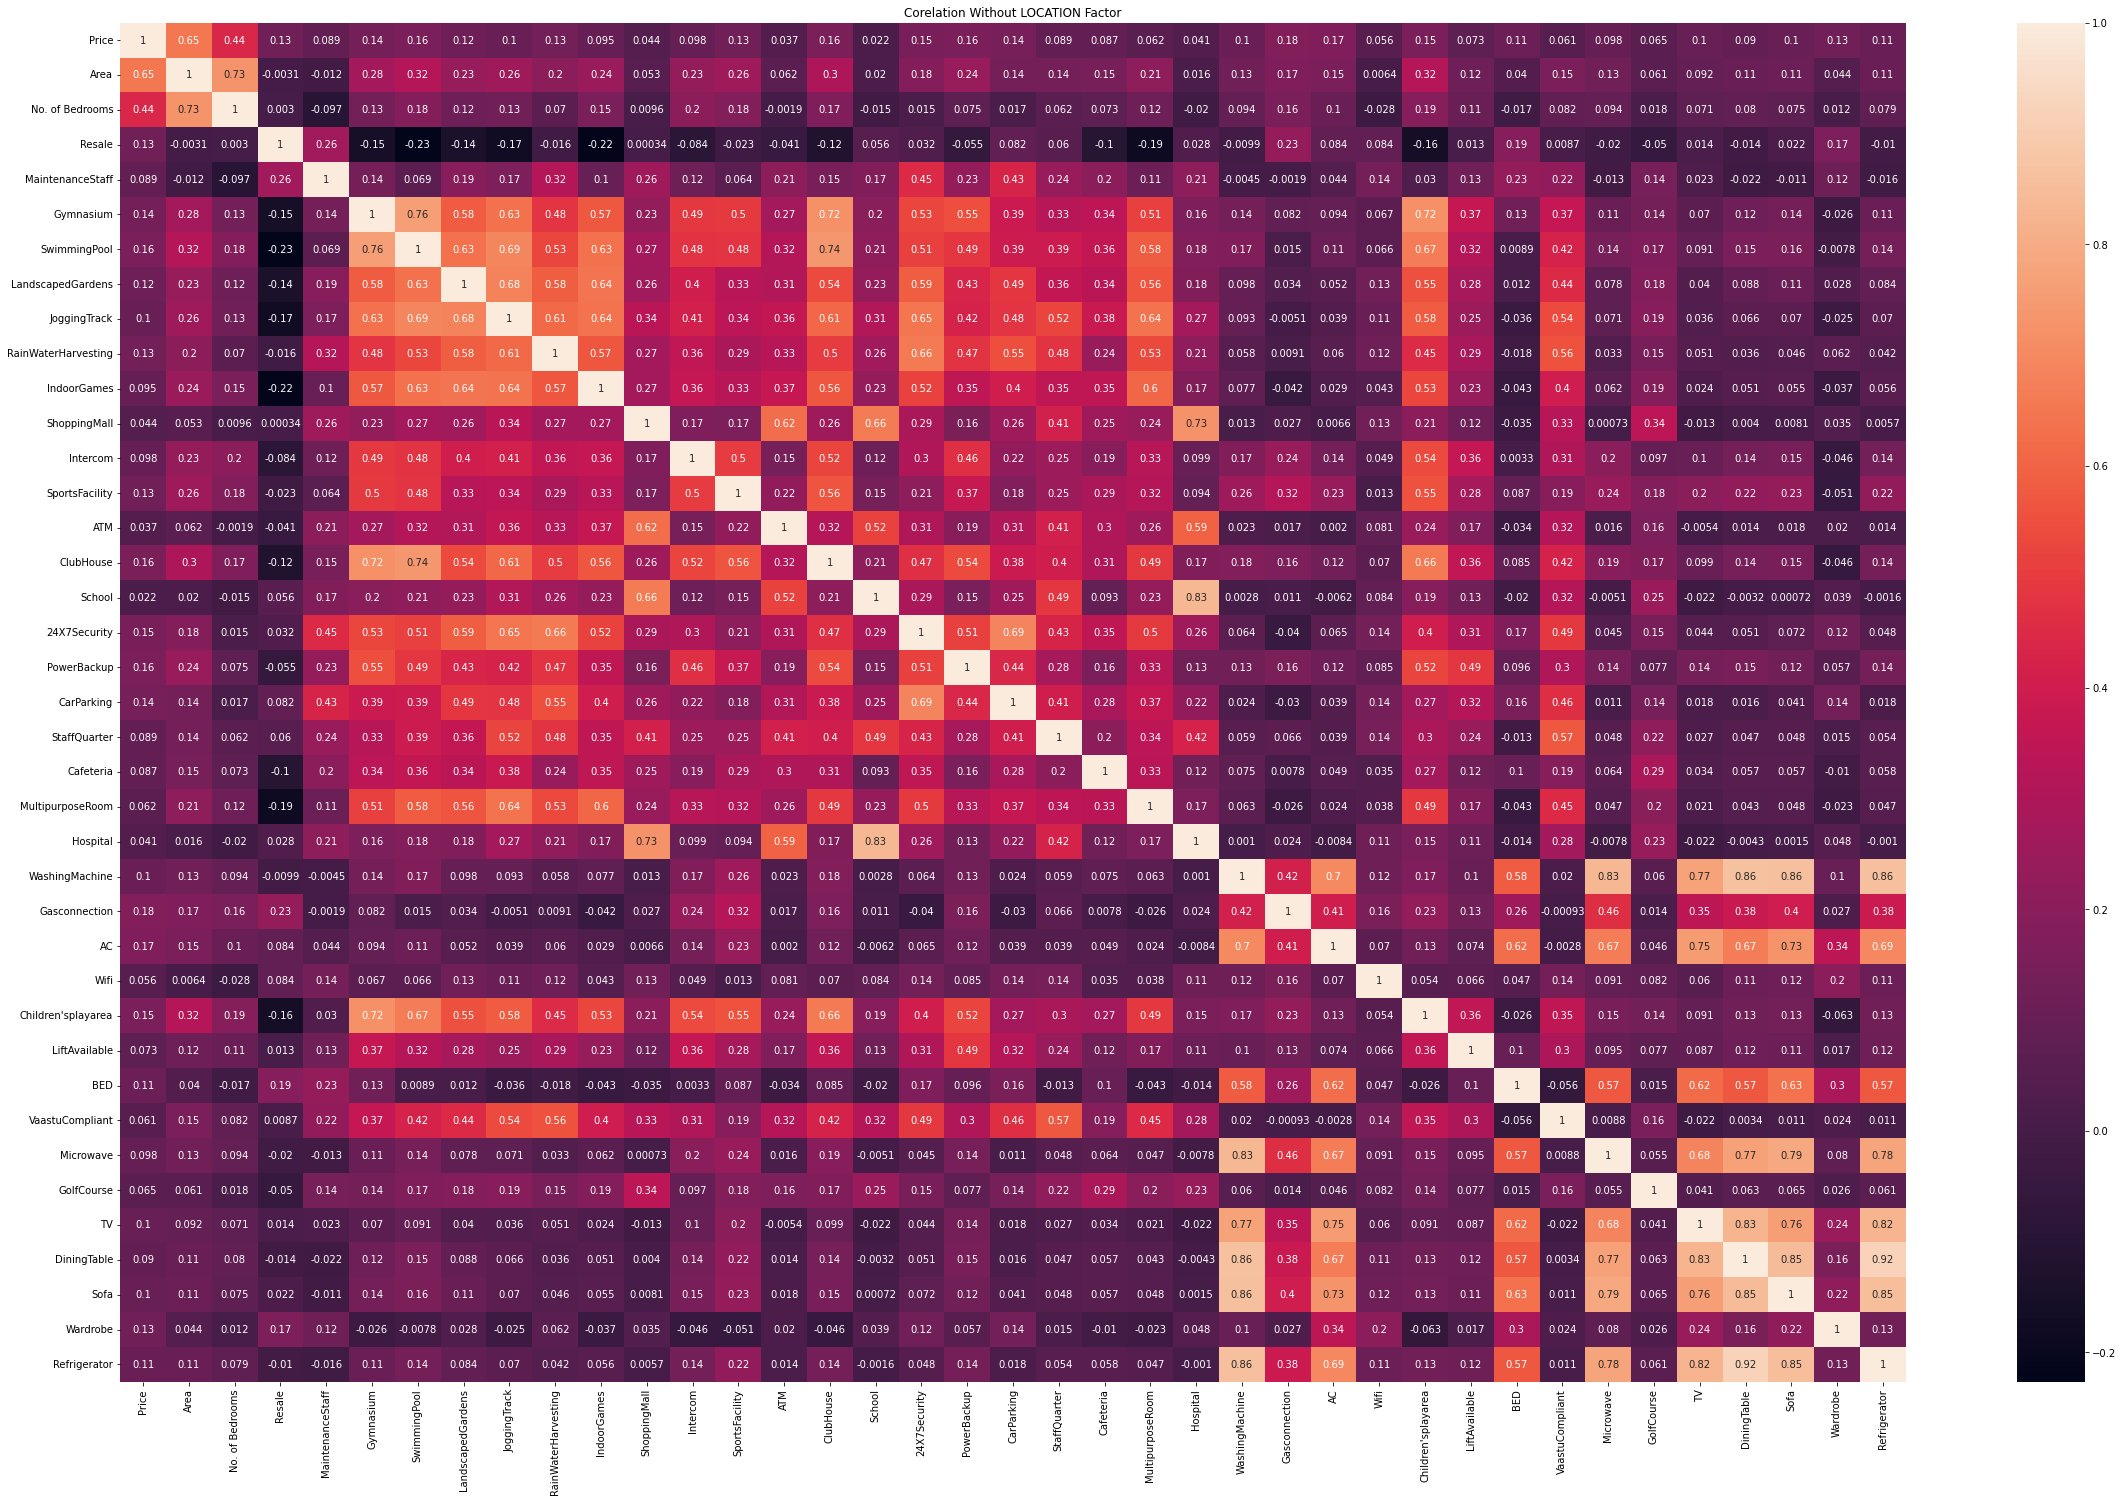

In [11]:
plt.figure(figsize= (40,25))
sns.heatmap(df.corr(), annot=True)
plt.title("Corelation Without LOCATION Factor")
# plt.savefig('../Results/Corelation-heatmap-Corelation-Without-LOCATION-Factor', dpi=500, bbox_inches='tight')

## 2. Data Transfromation and Scaling

### 2.1 Encoding Data: Label Encoding

In [12]:
# Checking that, is it feasible to use Label Encoding for 'Location column'?<br>
# ---> Yes, Because the no.of Total Rows are 7719 and No. of unique values for Location are 413.
df['Location'].unique()
df['Location'].unique().size

849

In [13]:
df['City'].unique()
df['City'].unique().size

6

In [14]:
# from sklearn.preprocessing ---> LabelEncoder
label_encoder = LabelEncoder()
print(label_encoder)

LabelEncoder()


In [15]:
df_encoded = df.copy()
df_encoded['Location'] = label_encoder.fit_transform(df['Location'])
df_encoded['City'] = label_encoder.fit_transform(df['City'])

In [16]:
df_encoded.head()

,Price,Area,City,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,0,254,4,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,0,155,2,0,0,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,0,302,2,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,0,163,3,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,0,319,3,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [17]:
df_encoded['Location'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10093 entries, 0 to 10092
Series name: Location
Non-Null Count  Dtype
--------------  -----
10093 non-null  int32
dtypes: int32(1)
memory usage: 39.6 KB


In [18]:
df_encoded['City'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10093 entries, 0 to 10092
Series name: City
Non-Null Count  Dtype
--------------  -----
10093 non-null  int32
dtypes: int32(1)
memory usage: 39.6 KB


In [19]:
# sns.scatterplot(df_encoded['Price'])
# plt.show()

Text(0.5, 1.0, 'Corealtion With LOCATION Factor')

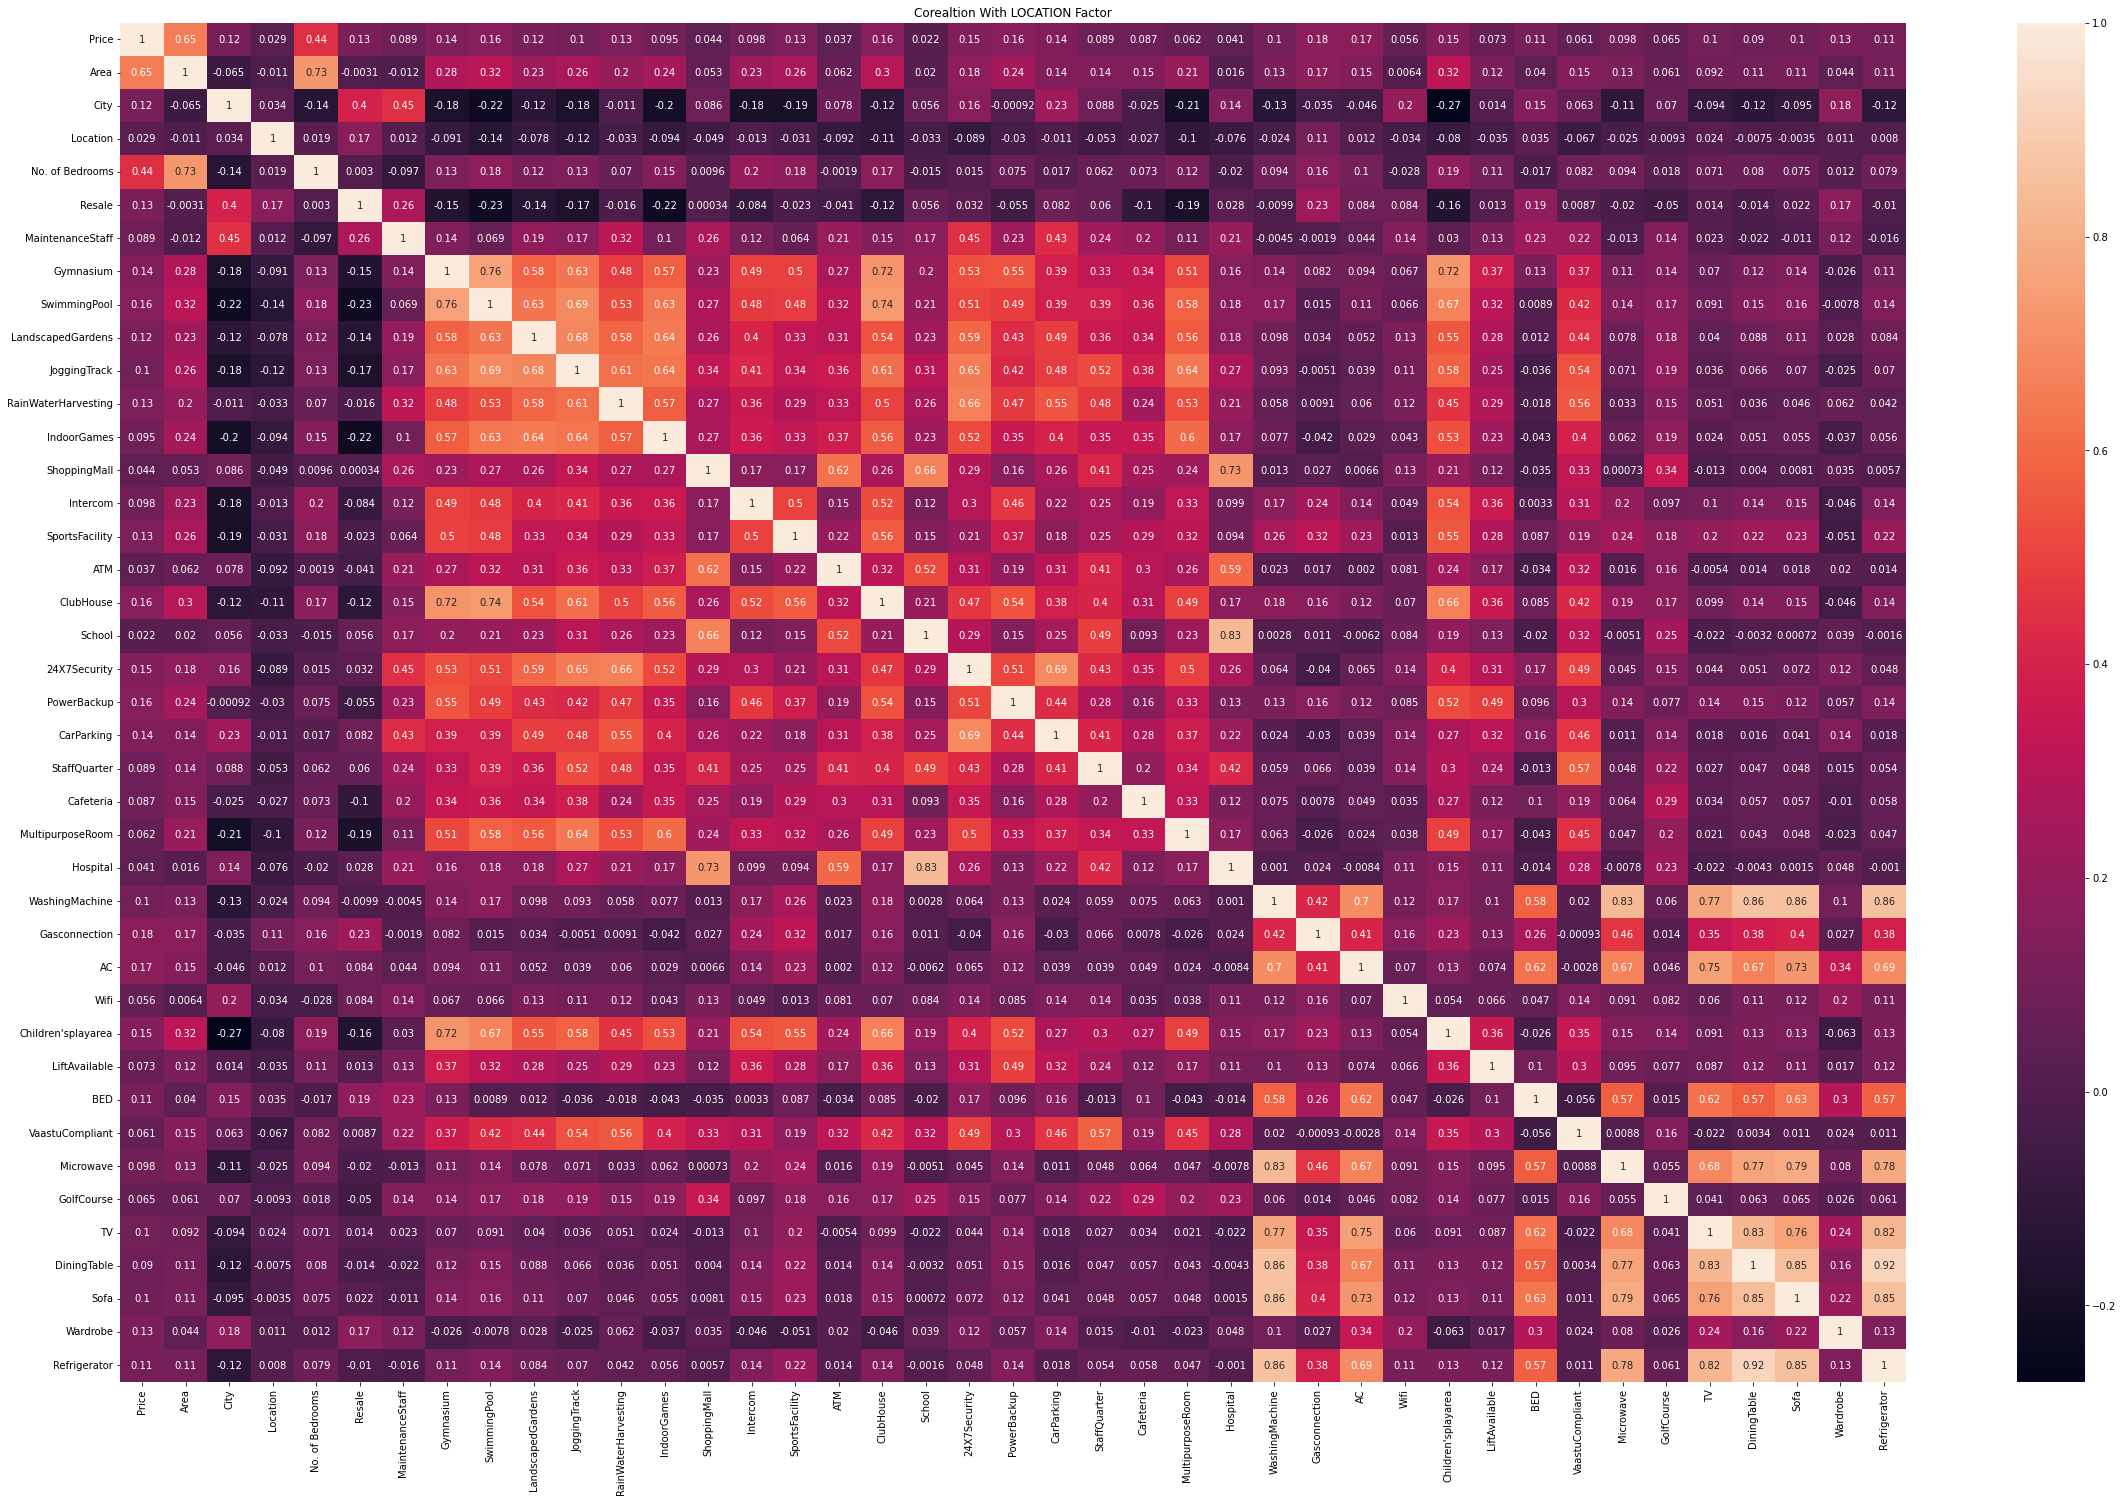

In [20]:
plt.figure(figsize= (40,25))
sns.heatmap(df_encoded.corr(), annot=True)
plt.title("Corealtion With LOCATION Factor")
# plt.show()
# plt.savefig('../Results/Corelation-heatmap-Corelation-With-LOCATION-Factor', dpi=500, bbox_inches='tight')

In [21]:
df_encoded.corr().iloc[0].sort_values(ascending=False)

Price                  1.000000
Area                   0.652585
No. of Bedrooms        0.439123
Gasconnection          0.176744
AC                     0.168448
ClubHouse              0.156836
PowerBackup            0.156585
SwimmingPool           0.156452
Children'splayarea     0.152377
24X7Security           0.148066
CarParking             0.143605
Gymnasium              0.140537
RainWaterHarvesting    0.134042
SportsFacility         0.130813
Resale                 0.128312
Wardrobe               0.125293
LandscapedGardens      0.123177
City                   0.117877
BED                    0.112406
Refrigerator           0.107972
WashingMachine         0.104595
TV                     0.103201
JoggingTrack           0.101692
Sofa                   0.099936
Microwave              0.098230
Intercom               0.097880
IndoorGames            0.095156
DiningTable            0.089542
StaffQuarter           0.088917
MaintenanceStaff       0.088580
Cafeteria              0.087466
LiftAvai

### 2.2 Encoding Data: One Hot Encoding

In [22]:
# -- from sklearn.preprocessing ---> OneHotEncoder
# df_ohe = df1.copy()<br>
# ohe = OneHotEncoder()<br>
# print(ohe)
# feature_array = ohe.fit_transform(df_ohe[['Location']]).toarray()
# feature_array = feature_array[:,1:]<br>
# column_names = df_ohe['Location'].tolist()
# df_ohe.drop('Location', axis = 1)<br>
# pd.DataFrame(feature_array, columns = column_names) 

### 2.3 Data Scaling

In [23]:
#  Scaling AREA and PRICE Data as it contains high deviation of values
df_scaled = df_encoded.copy()
scaler = MinMaxScaler()
df_scaled[['Area']] = scaler.fit_transform(df_scaled[['Area']])
df_scaled[['Price']] = scaler.fit_transform(df_scaled[['Price']])

In [24]:
df_scaled.head()

,Price,Area,City,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,0.070352,0.323711,0,254,4,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,0.014794,0.087113,0,155,2,0,0,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,0.007201,0.100928,0,302,2,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,0.015975,0.152062,0,163,3,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0.012173,0.151546,0,319,3,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


### 2.4 Splitting Data: Dependent and Independent Variable

In [25]:
df_temp = df_scaled.copy()
data = df_temp.drop('Price', axis=1)
price = df_temp['Price']

In [26]:
data.head()

,Area,City,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,0.323711,0,254,4,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,0.087113,0,155,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,0.100928,0,302,2,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,0.152062,0,163,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0.151546,0,319,3,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [27]:
price.head()

0    0.070352
1    0.014794
2    0.007201
3    0.015975
4    0.012173
Name: Price, dtype: float64

### 2.5 Train - Test Split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(data, price, test_size=0.2)
print(len(X_train), len(X_test), len(y_train), len(y_test))

8074 2019 8074 2019


## 3 Model Evaluation

### 3.1 Linear Regression

#### 3.1.1 Linear Regression: Training Model

In [29]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [30]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

#### 3.1.2 Linear Regression: Testing

In [31]:
y_predict_LR = LR.predict(X_test)
print(y_predict_LR)

[ 0.00069324 -0.00135899  0.0572797  ...  0.00873663  0.01023843
 -0.00116274]


#### 3.1.3 Linear Regression: Score / Results

In [32]:
LR_score = LR.score(X_test, y_test)
print(LR_score*100)

51.78985142764343


In [33]:
R2_Score_LR = r2_score(y_test, y_predict_LR)*100
MAE_LR = metrics.mean_absolute_error(y_test, y_predict_LR)*100
MSE_LR = metrics.mean_squared_error(y_test, y_predict_LR)*100
RSME_LR = np.sqrt(metrics.mean_squared_error(y_test, y_predict_LR))*100
print('R2 Score Linear Regression', R2_Score_LR)
print('MAE Linear Regression:', MAE_LR)
print('MSE Linear Regression:', MSE_LR)
print('RMSE Linear Regression:', RSME_LR)

R2 Score Linear Regression 51.78985142764343
MAE Linear Regression: 1.0443372237832227
MSE Linear Regression: 0.033200531290516734
RMSE Linear Regression: 1.8221012949481359


Text(0.5, 1.0, 'Linear Regression: Original Prices vs Predicted Prices')

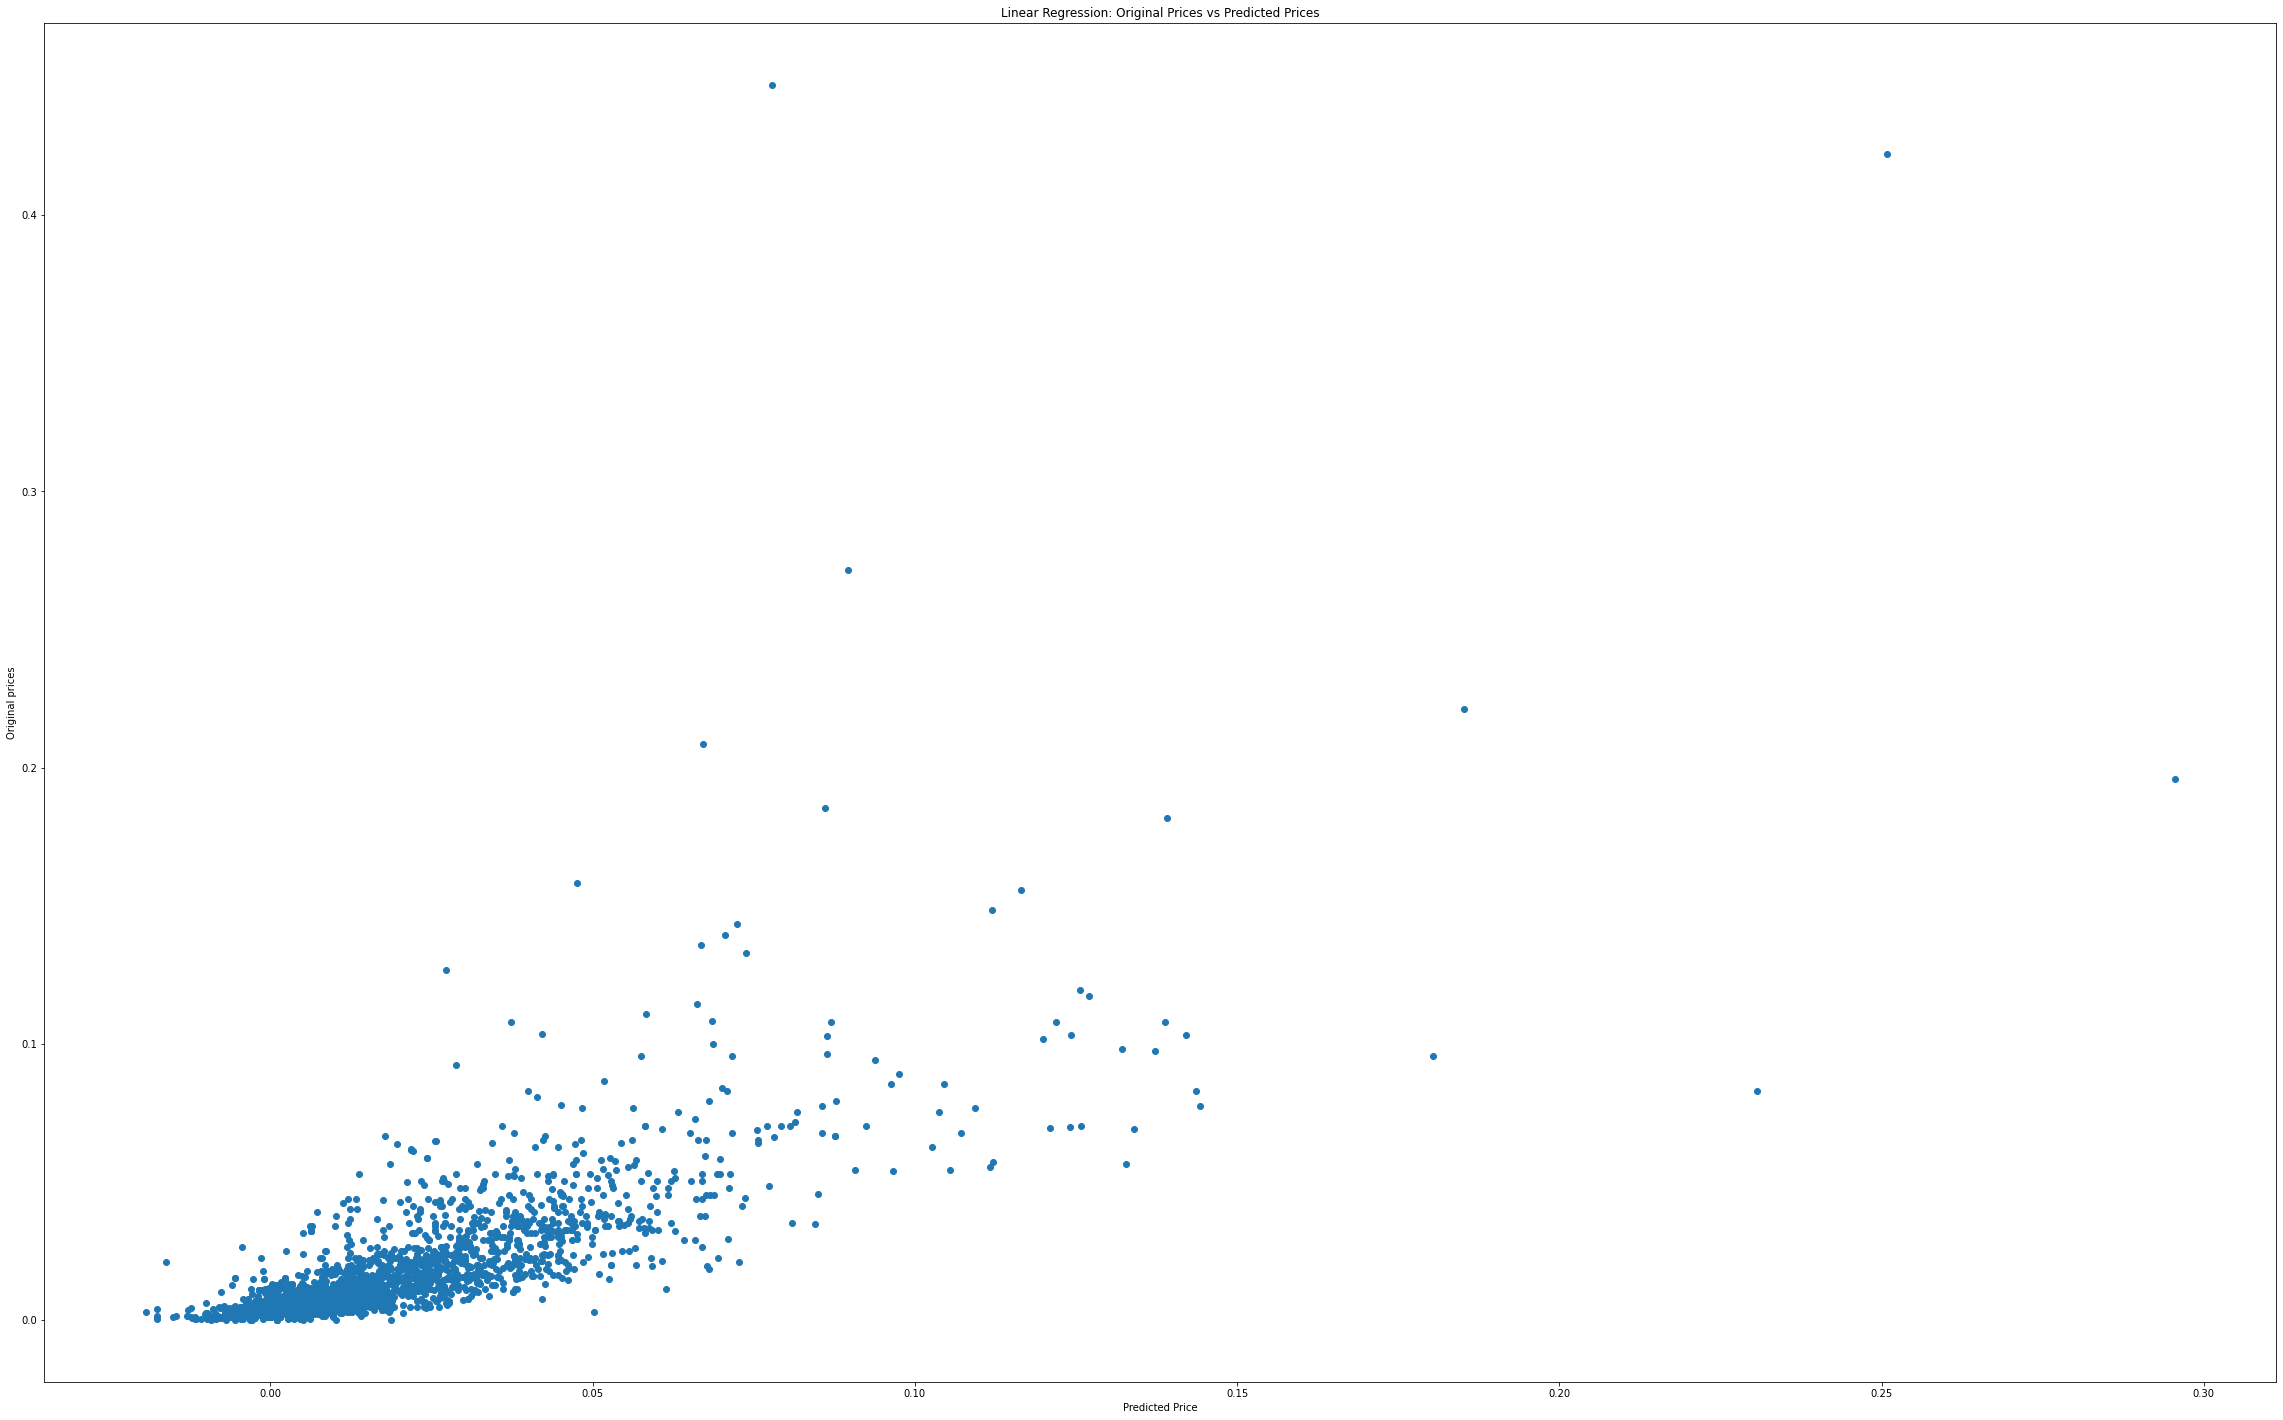

In [34]:
plt.figure(figsize= (40,25))
plt.scatter(y_predict_LR, y_test)
# plt.plot(y_test, LR.predict(X_test), color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Original prices")
plt.title("Linear Regression: Original Prices vs Predicted Prices")
# plt.show()
# plt.savefig('../Results/Linear-Regression-Predicted-vs-Original-Scattered', dpi=500, bbox_inches='tight')

Text(0.5, 1.0, 'Linear Regression: Original Prices vs Predicted Prices')

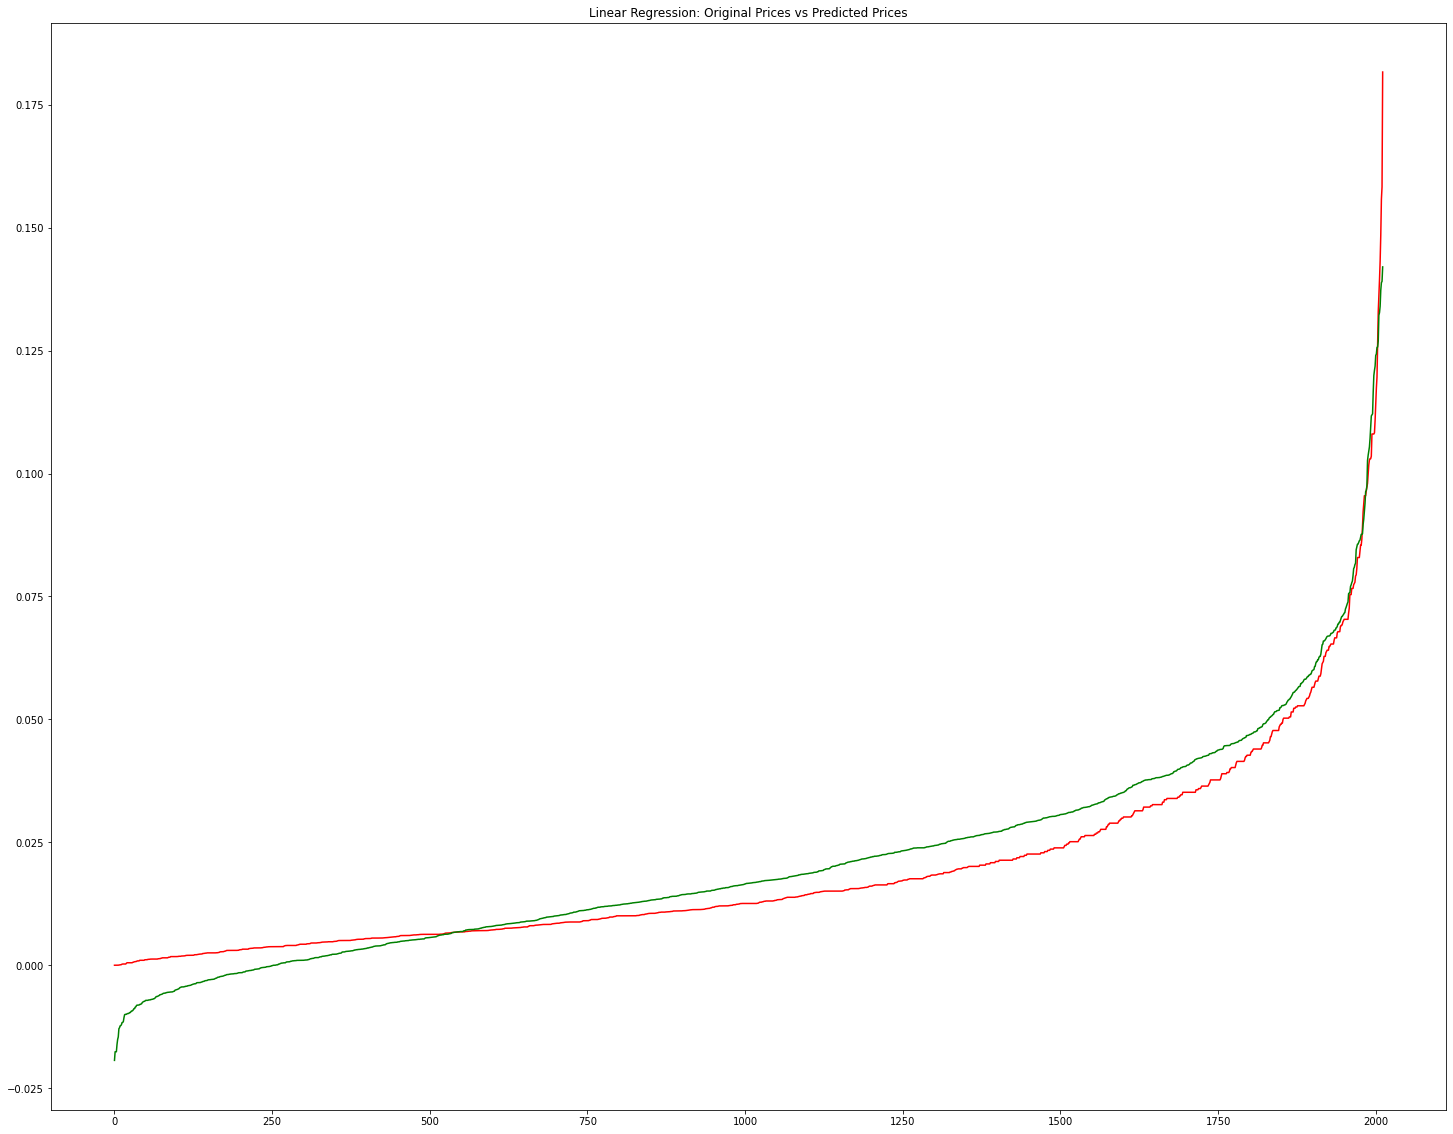

In [35]:
x = np.sort(y_test)[:-7]
y = np.sort(y_predict_LR)[:-7]
plt.figure(figsize=(25,20))
plt.plot(x, label = "Actual", color="red")
plt.plot(y, label = "Pridected", color='green')
plt.title("Linear Regression: Original Prices vs Predicted Prices")
# plt.savefig('../Results/Linear-Regression-Predicted-vs-Original-Line', dpi=500, bbox_inches='tight')

### 3.2 Ridge Regression

#### 3.2.1 Redge Regression: Model Training

In [36]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [37]:
RR = Ridge()
RR.fit(X_train,y_train)

Ridge()

#### 3.2.2 Ridge Regression: Testing

In [38]:
y_predict_RR = RR.predict(X_test)
print(y_predict_RR)

[ 0.00067737 -0.00102943  0.05721511 ...  0.00851245  0.01035323
 -0.00109595]


#### 3.2.3 Ridge Regression: Score / Results

In [39]:
RR_score = RR.score(X_test, y_test)
print(RR_score*100)

52.53020885576032


In [40]:
R2_Score_RR = r2_score(y_test, y_predict_RR)*100
MAE_RR = metrics.mean_absolute_error(y_test, y_predict_RR)*100
MSE_RR = metrics.mean_squared_error(y_test, y_predict_RR)*100
RSME_RR = np.sqrt(metrics.mean_squared_error(y_test, y_predict_RR))*100
print('R2 Score Linear Regression', R2_Score_RR)
print('MAE Ridge Regression:', MAE_RR)
print('MSE Ridge Regression:', MSE_RR)
print('RMSE Ridge Regression:', RSME_RR)

R2 Score Linear Regression 52.53020885576032
MAE Ridge Regression: 1.0303695761934373
MSE Ridge Regression: 0.03269067474192159
RMSE Ridge Regression: 1.8080562696421145


Text(0.5, 1.0, 'Ridge Regression: Original Prices vs Predicted Prices')

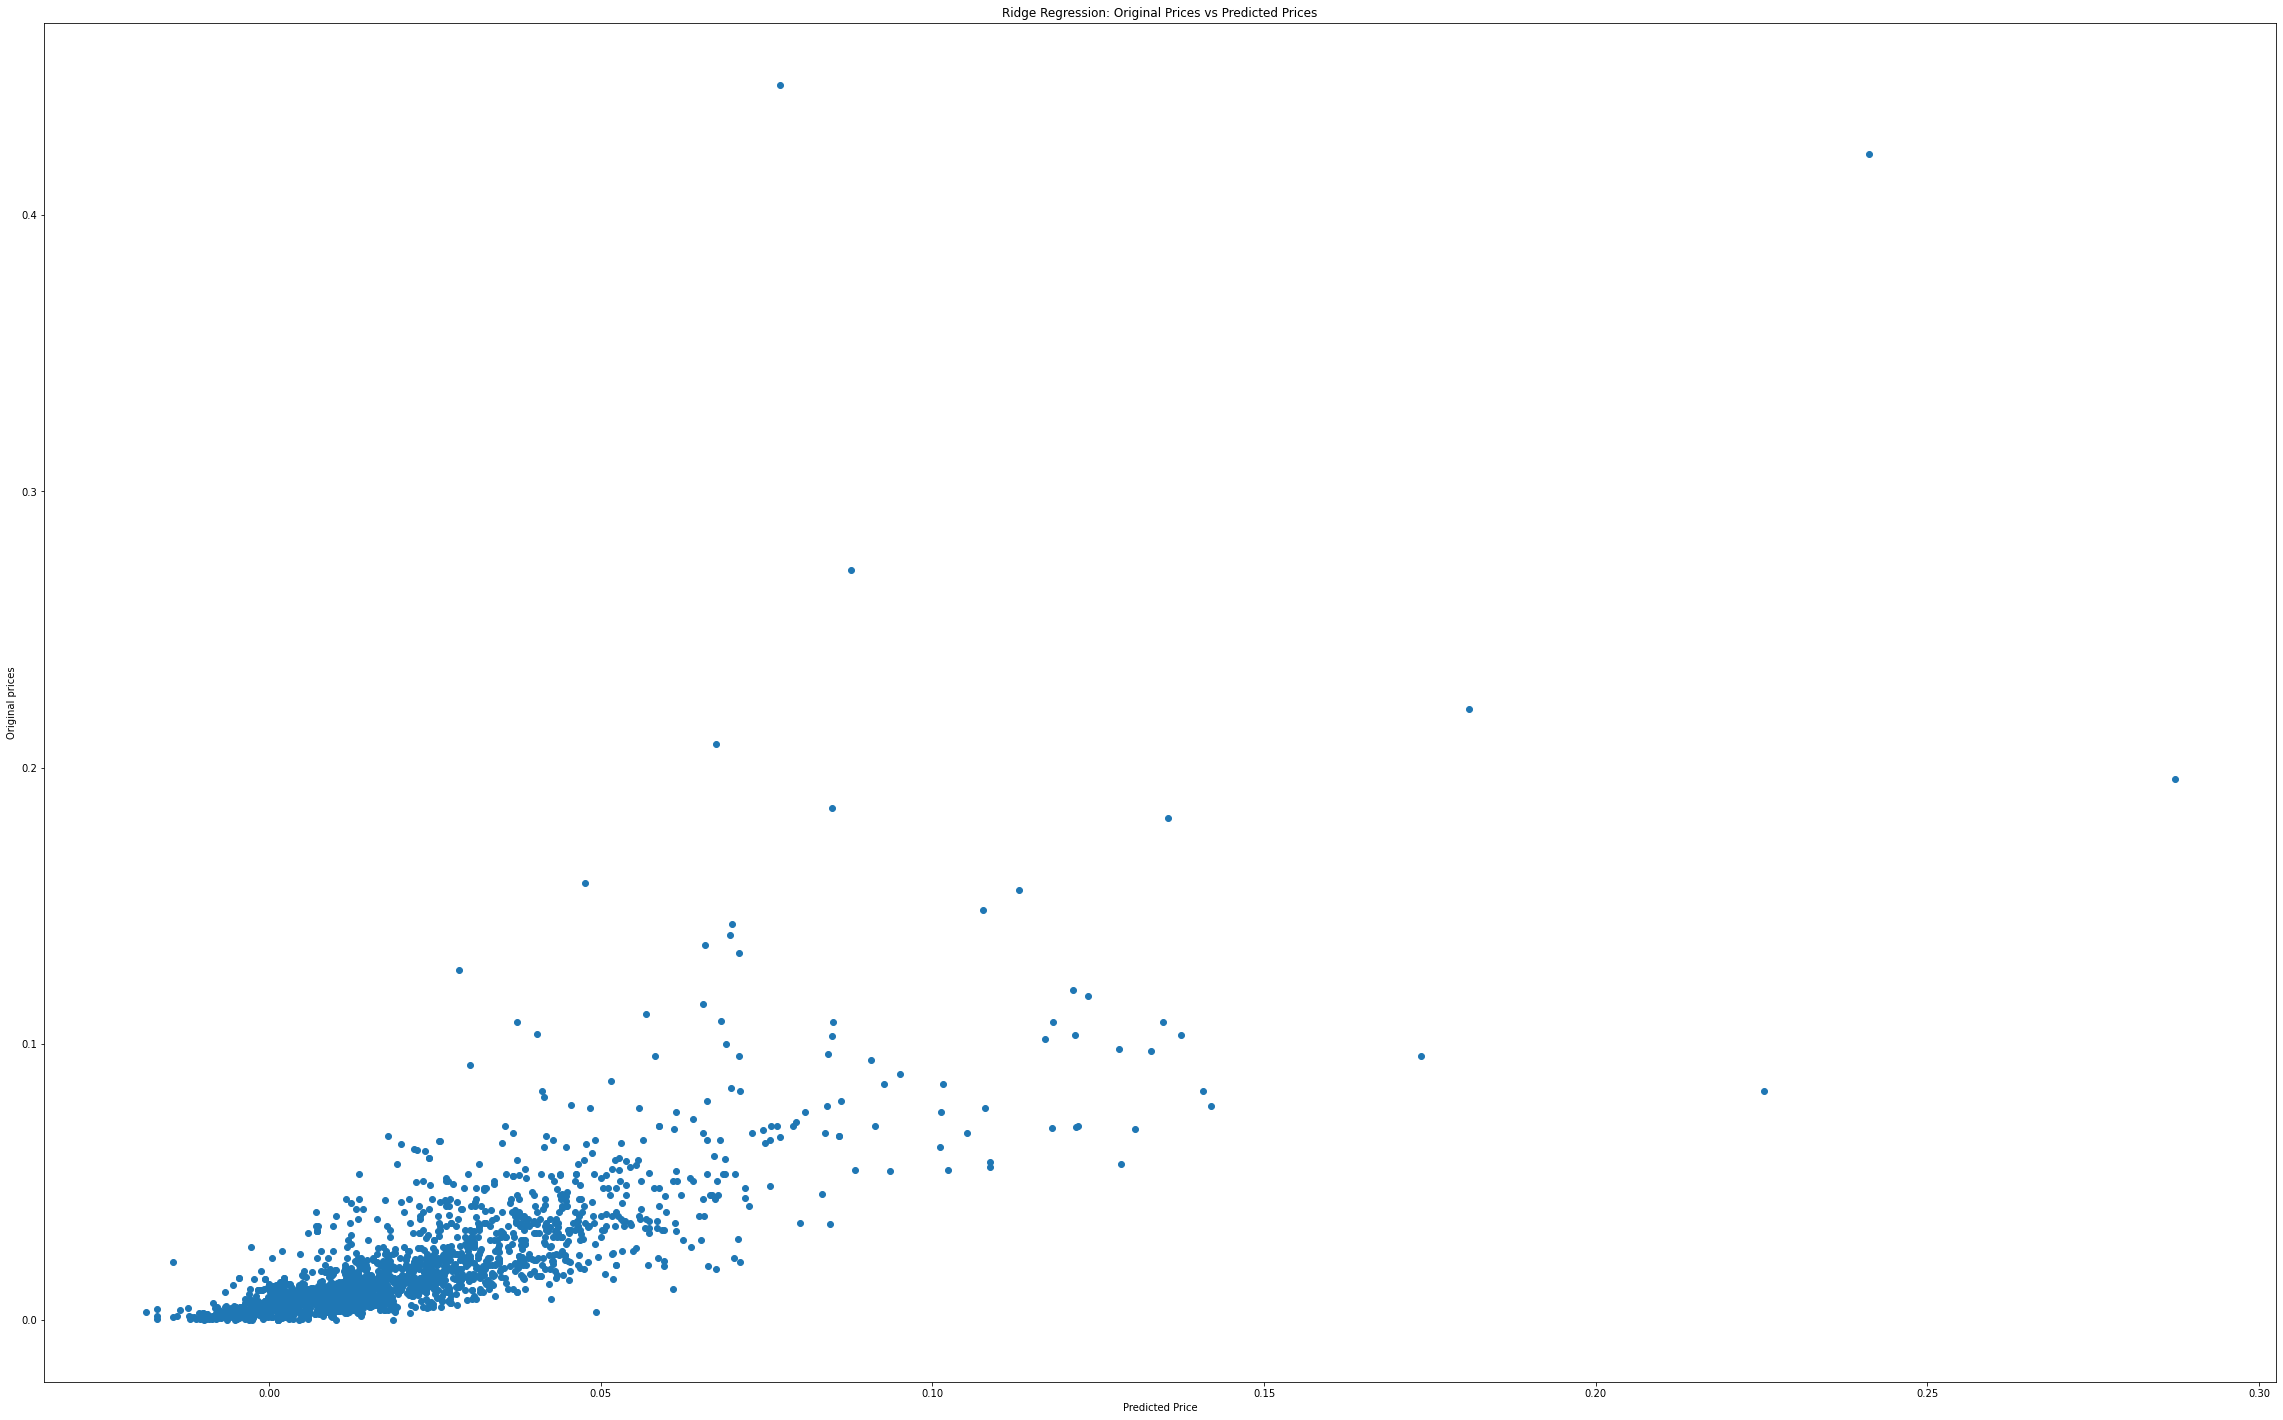

In [41]:
plt.figure(figsize= (40,25))
plt.scatter(y_predict_RR, y_test)
# plt.plot(y_test, LR.predict(X_test), color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Original prices")
plt.title("Ridge Regression: Original Prices vs Predicted Prices")
# plt.show()
# plt.savefig('../Results/Ridge-Regression-Predicted-vs-Original-Scattered', dpi=500, bbox_inches='tight')

Text(0.5, 1.0, 'Ridge Regression: Original Prices vs Predicted Prices')

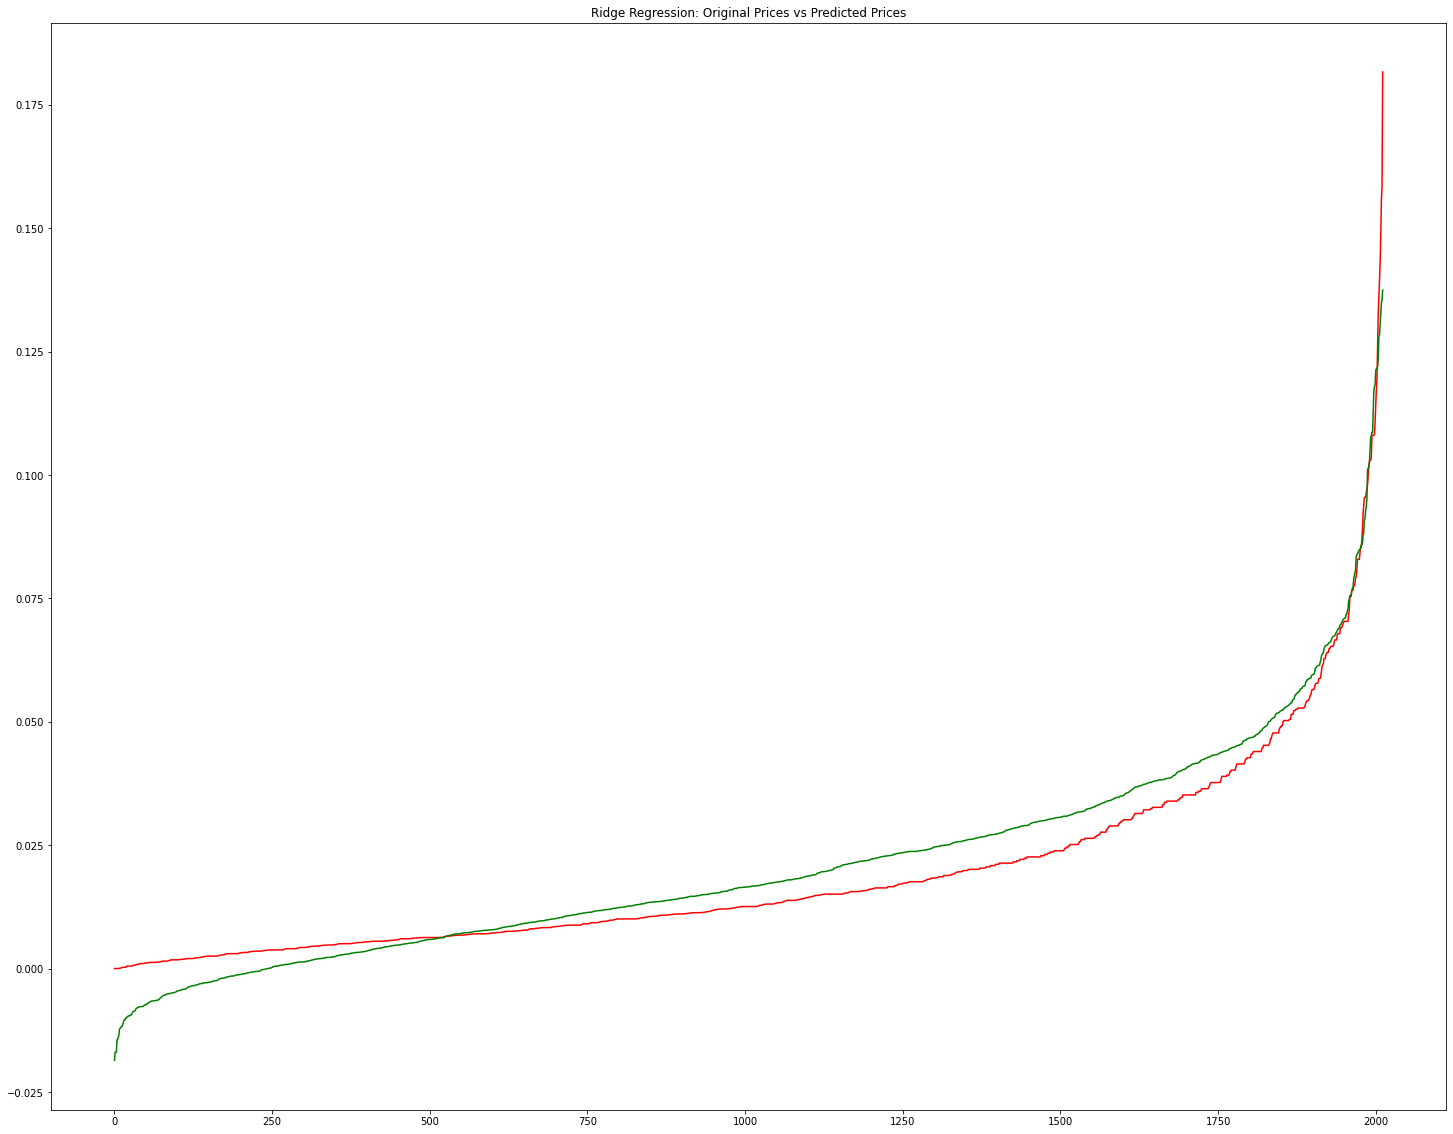

In [42]:
x = np.sort(y_test)[:-7]
y = np.sort(y_predict_RR)[:-7]
plt.figure(figsize=(25,20))
plt.plot(x, label = "Actual", color="red")
plt.plot(y, label = "Pridected", color='green')
plt.title("Ridge Regression: Original Prices vs Predicted Prices")
# plt.savefig('../Results/Ridge-Regression-Predicted-vs-Original-Line', dpi=500, bbox_inches='tight')

### 3.3 Lasso Regression

#### 3.3.1 Lasso Regression: Model Training

In [43]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [44]:
Lasso_R = Lasso()
Lasso_R.fit(X_train,y_train)

Lasso()

#### 3.3.2 Lasso Regression: Testing

In [45]:
y_predict_Lasso_R = Lasso_R.predict(X_test)
print(y_predict_Lasso_R)

[0.02119376 0.02119376 0.02119376 ... 0.02119376 0.02119376 0.02119376]


#### 3.3.3 Lasso Regression: Score / Results

In [46]:
Lasso_R_score = Lasso_R.score(X_test, y_test)
print(Lasso_R_score*100)

-0.11866342183506351


In [47]:
R2_Score_Lasso_R = r2_score(y_test, y_predict_Lasso_R)*100
MAE_Lasso_R = metrics.mean_absolute_error(y_test, y_predict_Lasso_R)*100
MSE_Lasso_R = metrics.mean_squared_error(y_test, y_predict_Lasso_R)*100
RSME_Lasso_R = np.sqrt(metrics.mean_squared_error(y_test, y_predict_Lasso_R))*100
print('R2 Score Linear Regression', R2_Score_Lasso_R)
print('MAE Ridge Regression:', MAE_Lasso_R)
print('MSE Ridge Regression:', MSE_Lasso_R)
print('RMSE Ridge Regression:', RSME_Lasso_R)

R2 Score Linear Regression -0.11866342183506351
MAE Ridge Regression: 1.568260510246569
MSE Ridge Regression: 0.0689479895029261
RMSE Ridge Regression: 2.625794917790156


Text(0.5, 1.0, 'Lasso Regression: Original Prices vs Predicted Prices')

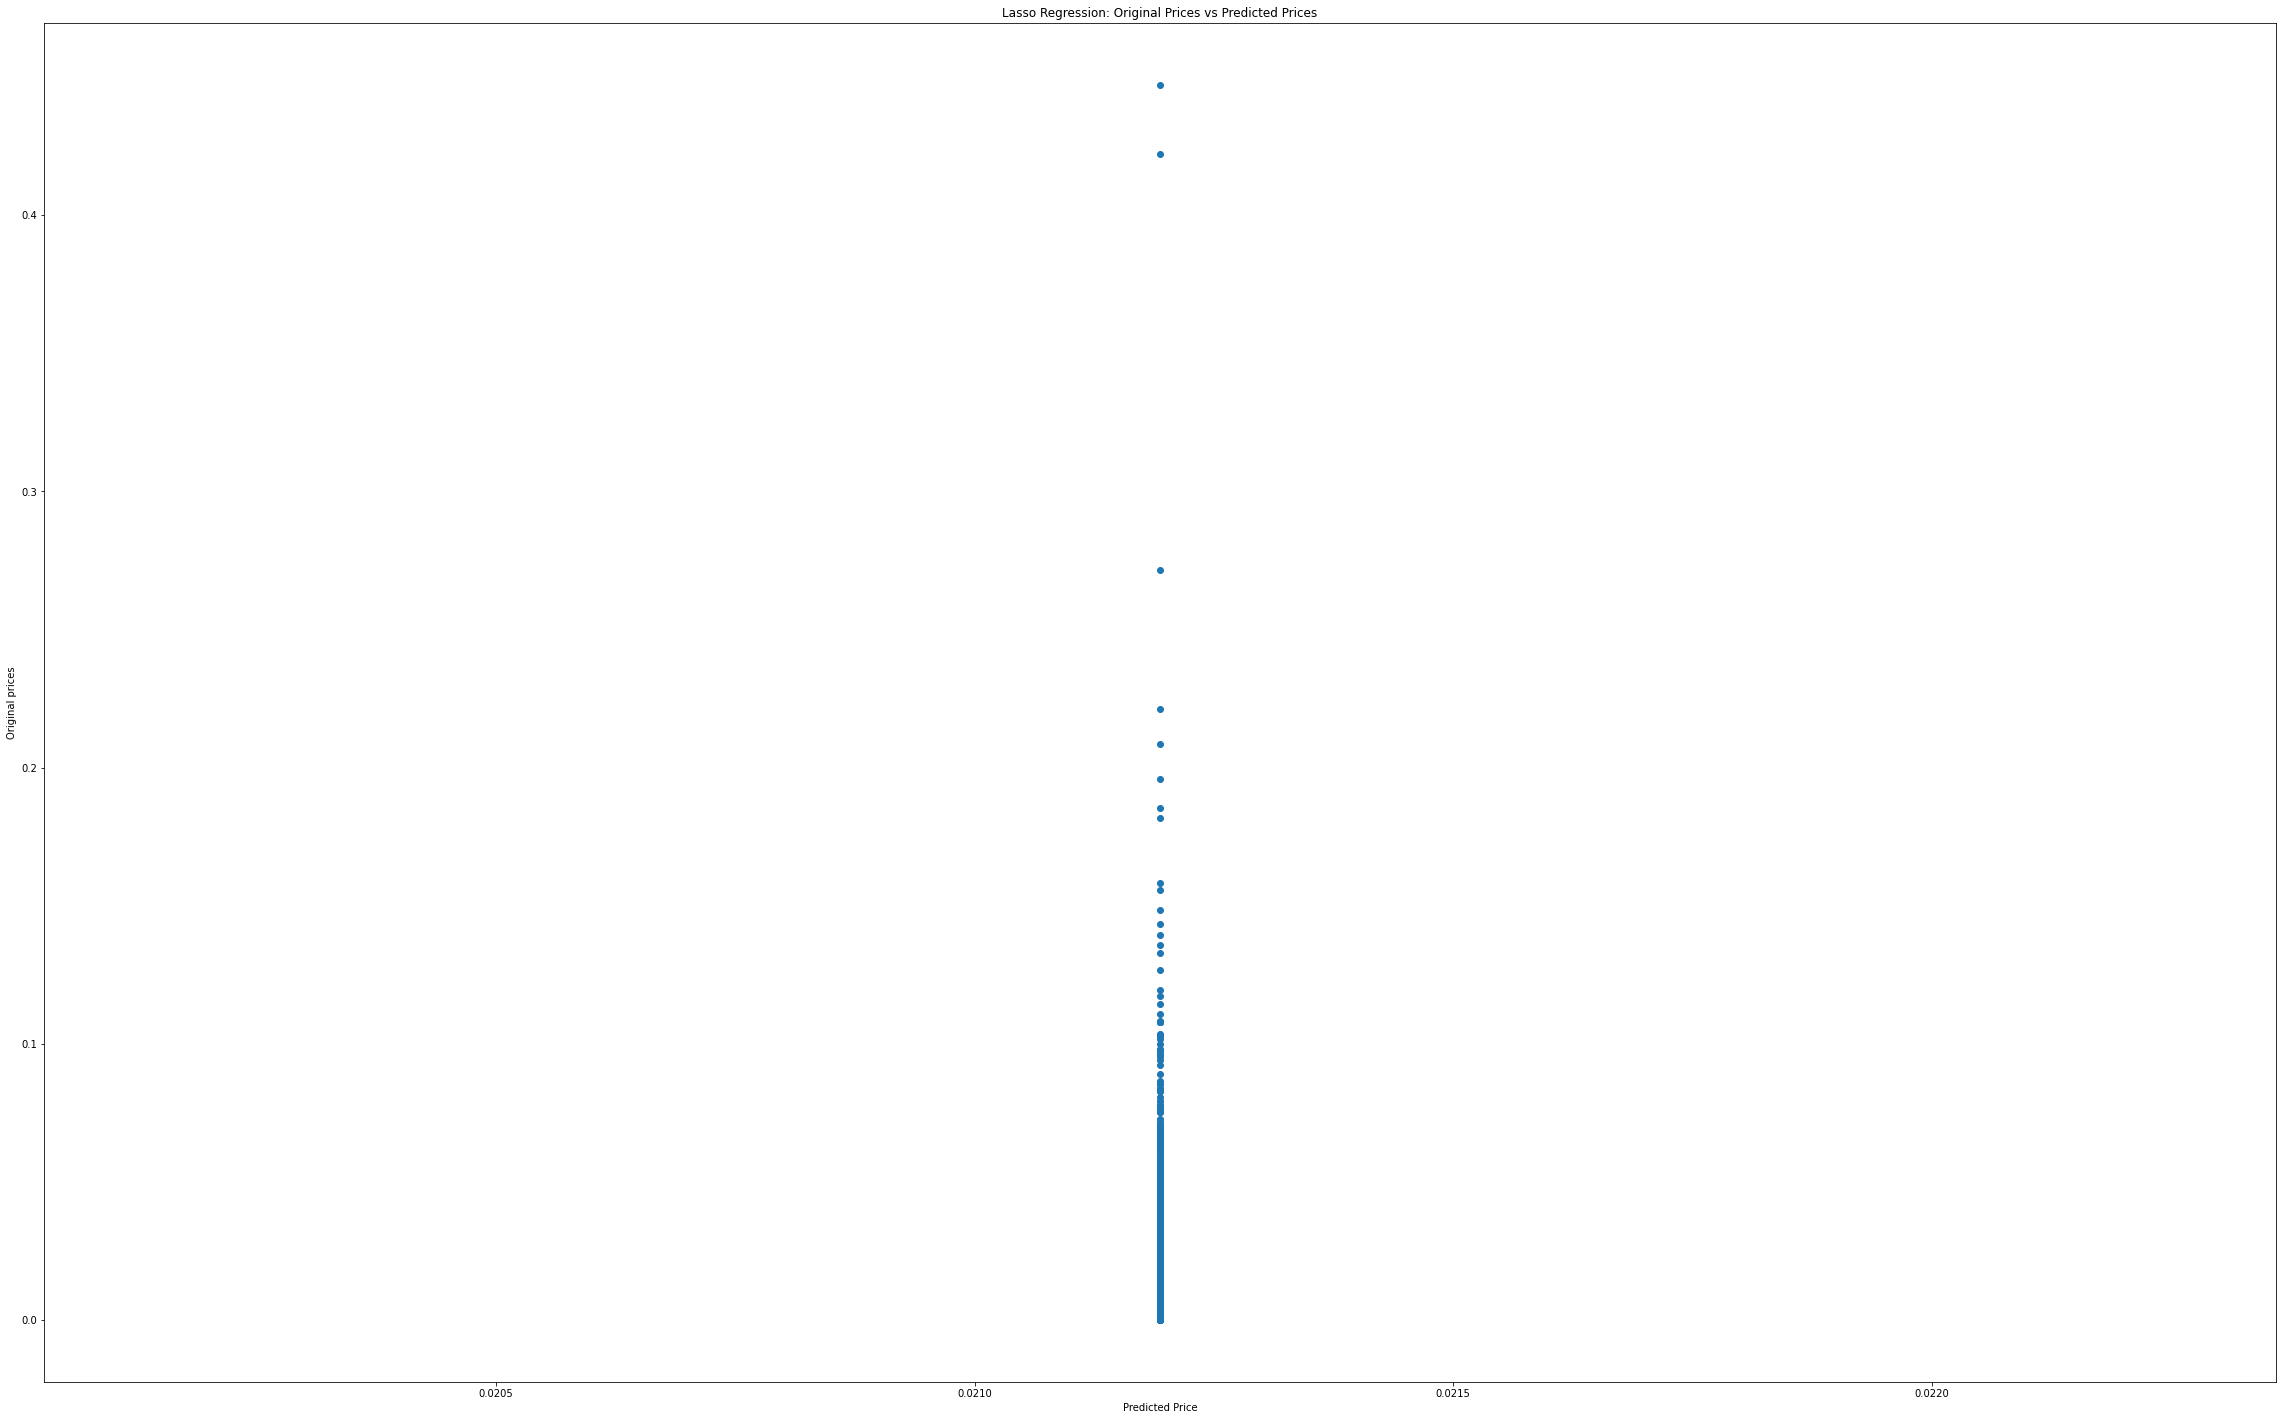

In [48]:
plt.figure(figsize= (40,25))
plt.scatter(y_predict_Lasso_R, y_test)
# plt.plot(y_test, LR.predict(X_test), color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Original prices")
plt.title("Lasso Regression: Original Prices vs Predicted Prices")
# plt.show()
# plt.savefig('../Results/Lasso-Regression-Predicted-vs-Original-Scattered', dpi=500, bbox_inches='tight')

Text(0.5, 1.0, 'Lasso Regression: Original Prices vs Predicted Prices')

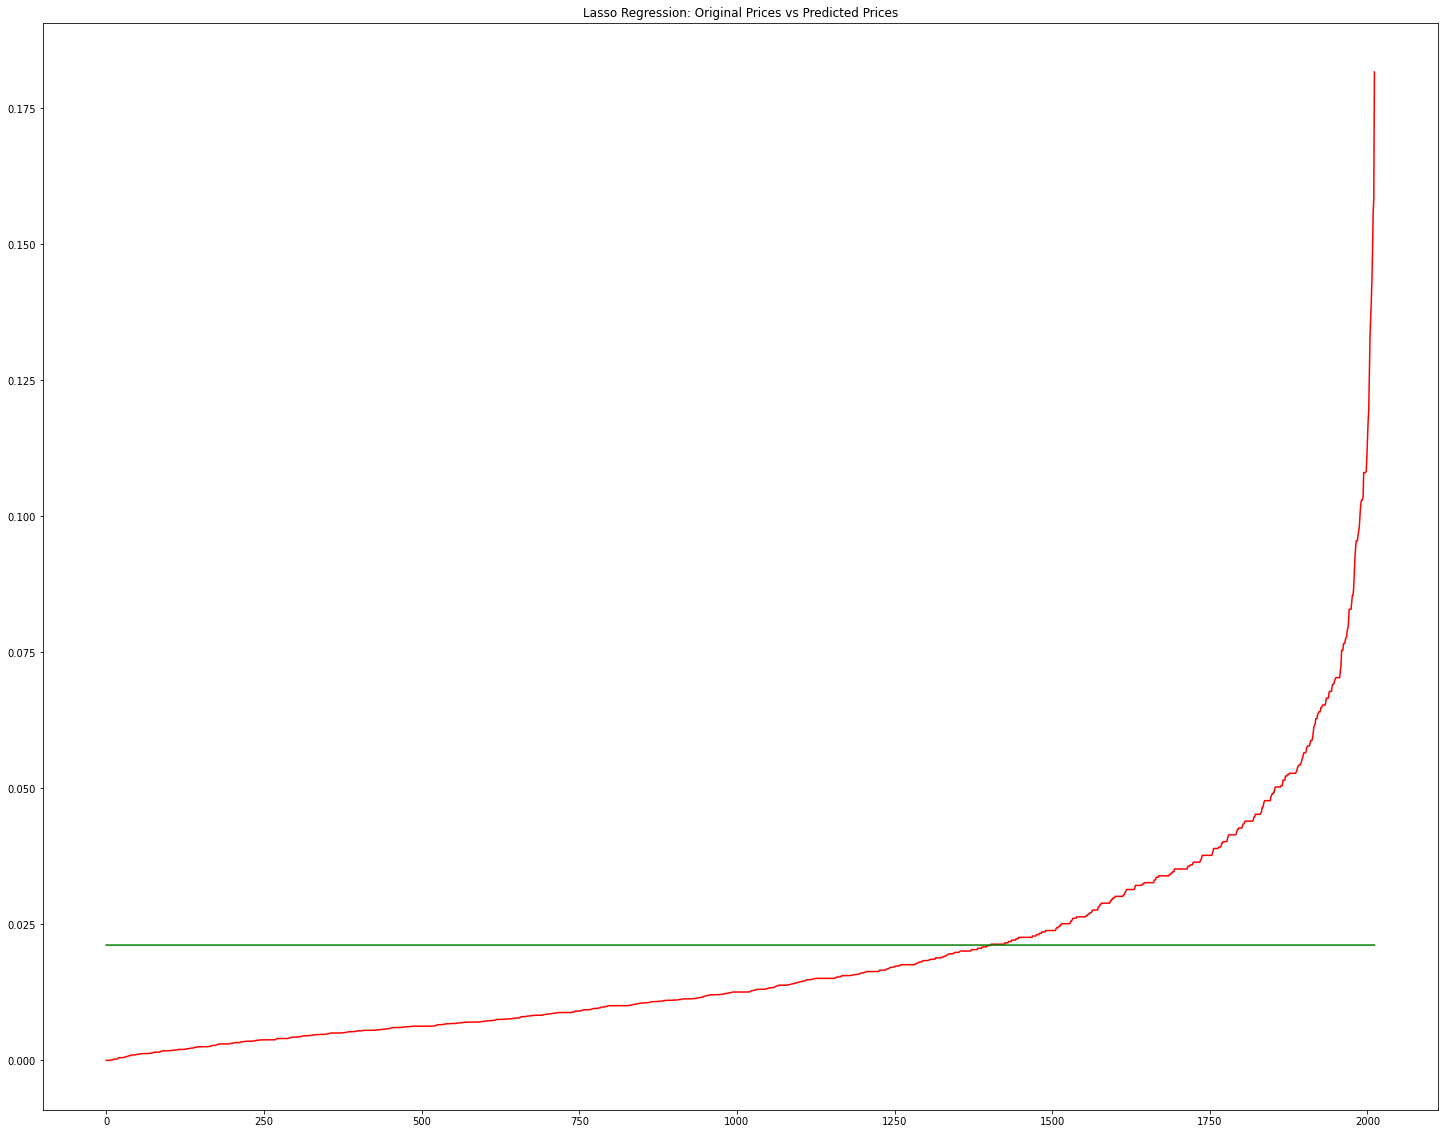

In [49]:
x = np.sort(y_test)[:-7]
y = np.sort(y_predict_Lasso_R)[:-7]
plt.figure(figsize=(25,20))
plt.plot(x, label = "Actual", color="red")
plt.plot(y, label = "Pridected", color='green')
plt.title("Lasso Regression: Original Prices vs Predicted Prices")
# plt.savefig('../Results/Lasso-Regression-Predicted-vs-Original-Line', dpi=500, bbox_inches='tight')

### 3.4 Decision Tree

#### 3.4.1 Decision Tree: Model Training

In [50]:
from sklearn.tree import DecisionTreeRegressor

In [51]:
DT = DecisionTreeRegressor(max_depth=5)
DT.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

#### 3.4.2 Decision Tree: Testing

In [52]:
y_predict_DT = DT.predict(X_test)
print(y_predict_DT)

[0.00764402 0.00764402 0.0303751  ... 0.00798848 0.01105518 0.00764402]


#### 3.4.3 Decision Tree: Score / Results

In [53]:
DT_score = DT.score(X_test, y_test)
print(DT_score*100)

72.76947775045328


In [54]:
R2_Score_DT = r2_score(y_test, y_predict_DT)*100
MAE_DT = metrics.mean_absolute_error(y_test, y_predict_DT)*100
MSE_DT = metrics.mean_squared_error(y_test, y_predict_DT)*100
RSME_DT = np.sqrt(metrics.mean_squared_error(y_test, y_predict_DT))*100
print('R2 Score Linear Regression', R2_Score_DT)
print('MAE Ridge Regression:', MAE_DT)
print('MSE Ridge Regression:', MSE_DT)
print('RMSE Ridge Regression:', RSME_DT)

R2 Score Linear Regression 72.76947775045328
MAE Ridge Regression: 0.7528362378799763
MSE Ridge Regression: 0.01875264509185885
RMSE Ridge Regression: 1.3694029754553205


Text(0.5, 1.0, 'Decision Tree: Original Prices vs Predicted Prices')

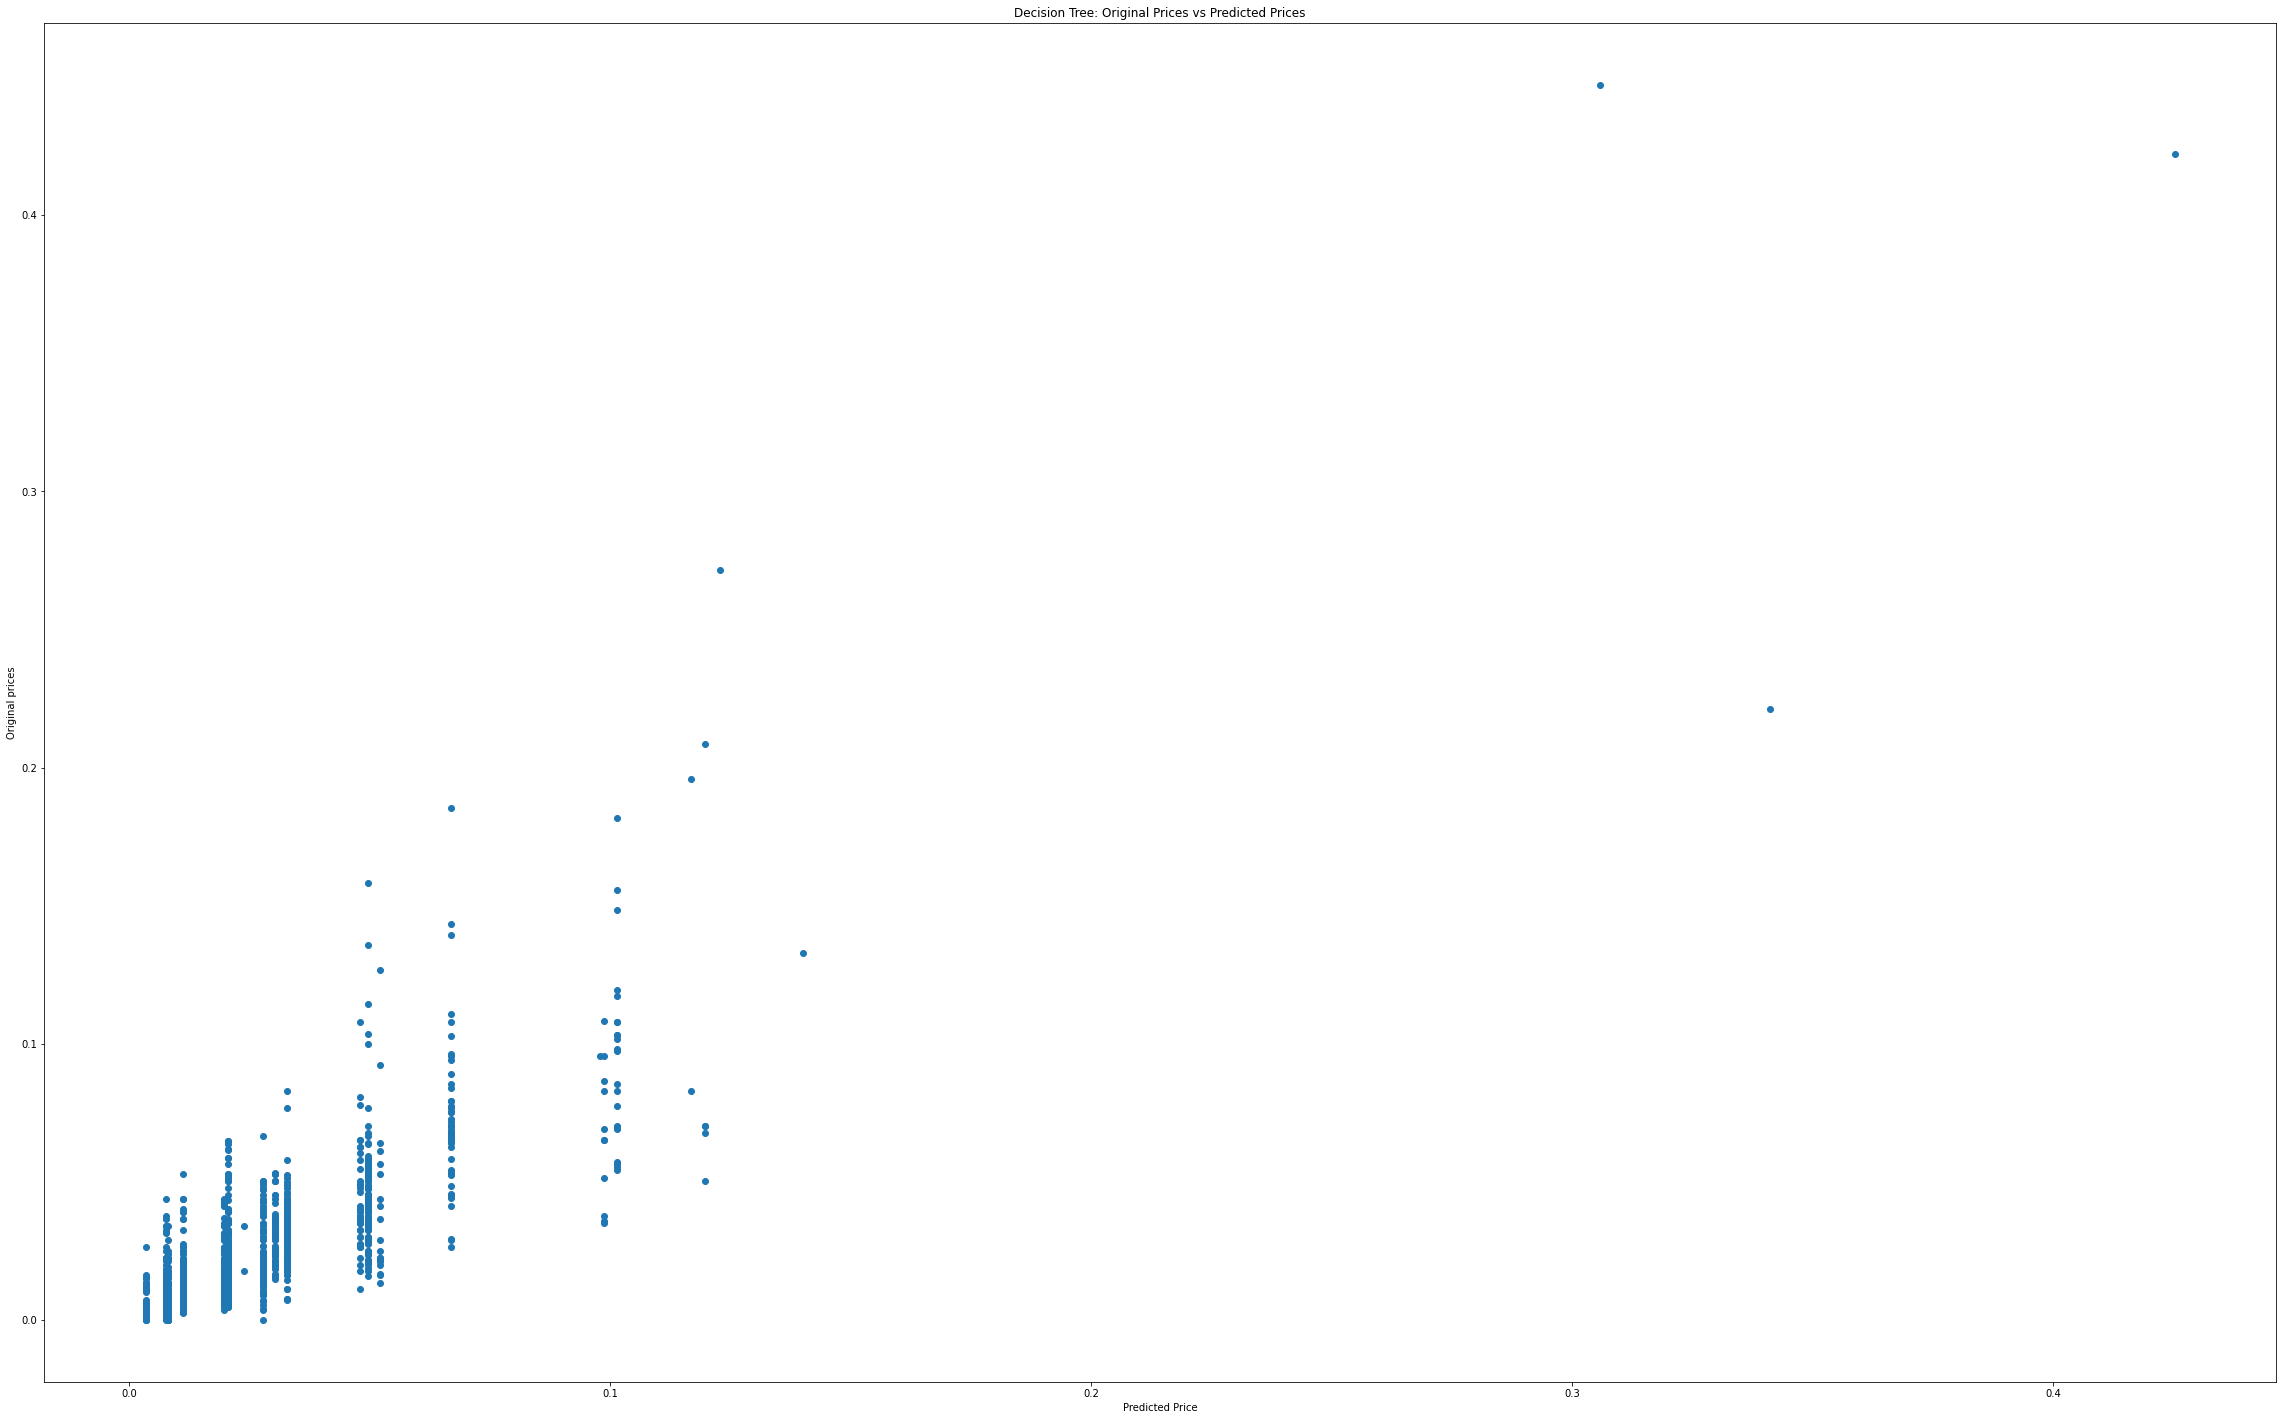

In [55]:
plt.figure(figsize= (40,25))
plt.scatter(y_predict_DT, y_test)
# plt.plot(y_test, LR.predict(X_test), color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Original prices")
plt.title("Decision Tree: Original Prices vs Predicted Prices")
# plt.show()
# plt.savefig('../Results/Decision-Tree-Predicted-vs-Original-Scattered', dpi=500, bbox_inches='tight')

In [56]:
from sklearn import tree

Text(0.5, 1.0, 'Decision Tree Depiction')

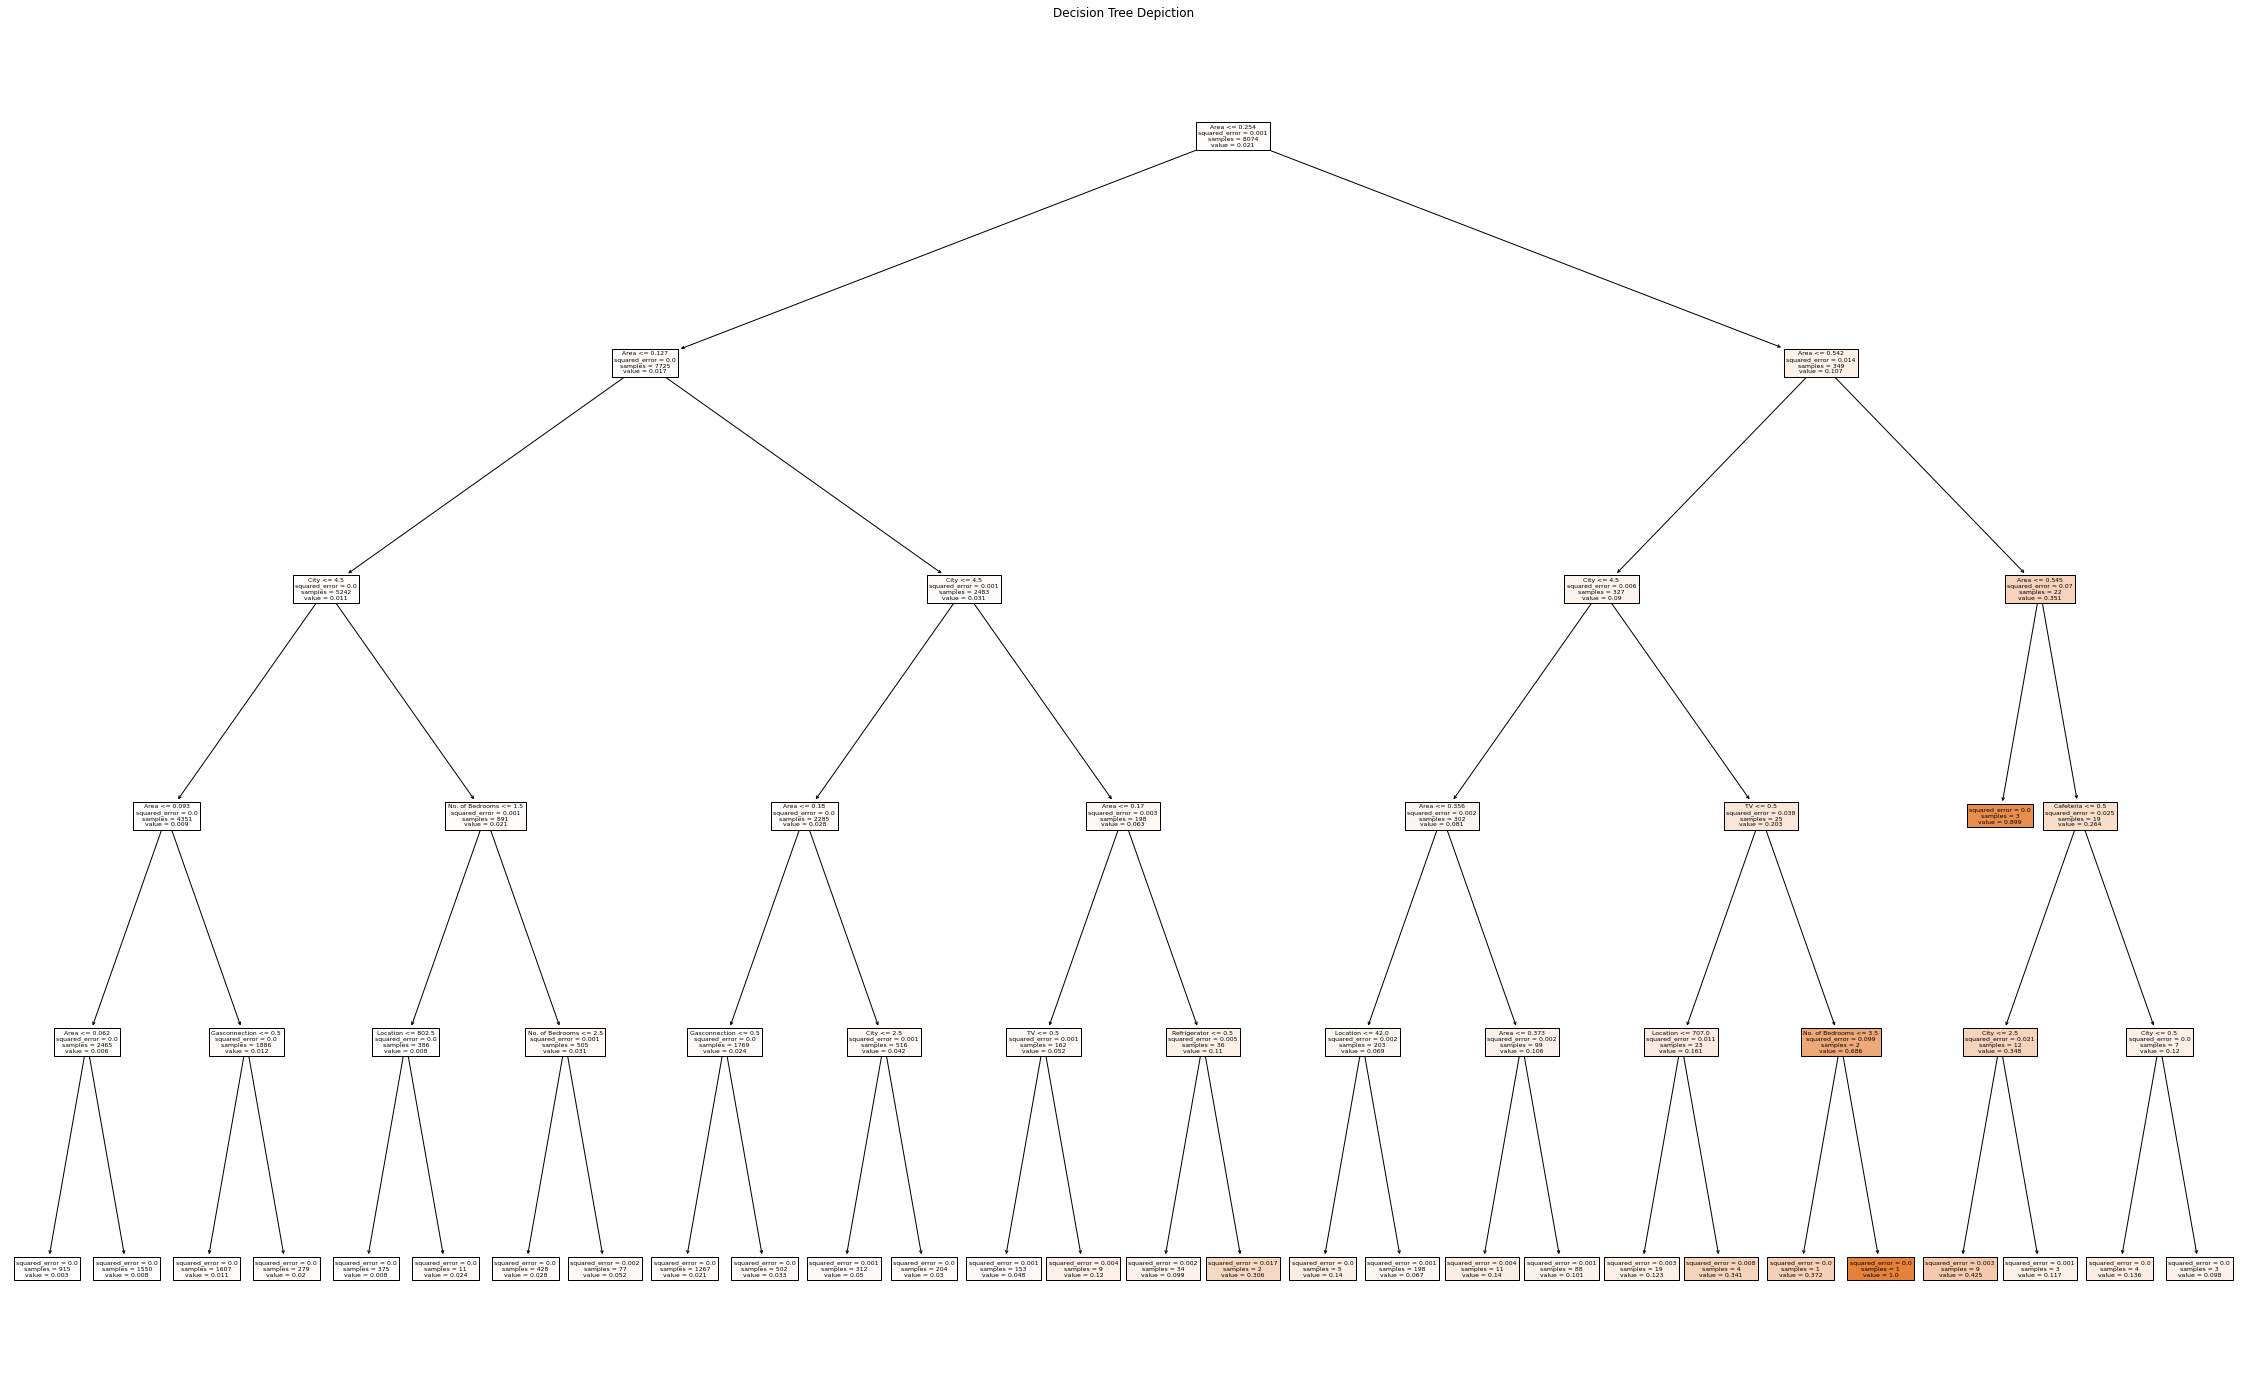

In [57]:
plt.figure(figsize= (40,25))
tree.plot_tree(DT, feature_names=data.columns, class_names=price, filled = True)
plt.title("Decision Tree Depiction")
# plt.savefig('../Results/Decision-Tree-Depiction', dpi=500, bbox_inches='tight')

In [58]:
# !pip install -q dtreeviz -> for visualization not working currently

Text(0.5, 1.0, 'Decision Tree: Original Prices vs Predicted Prices')

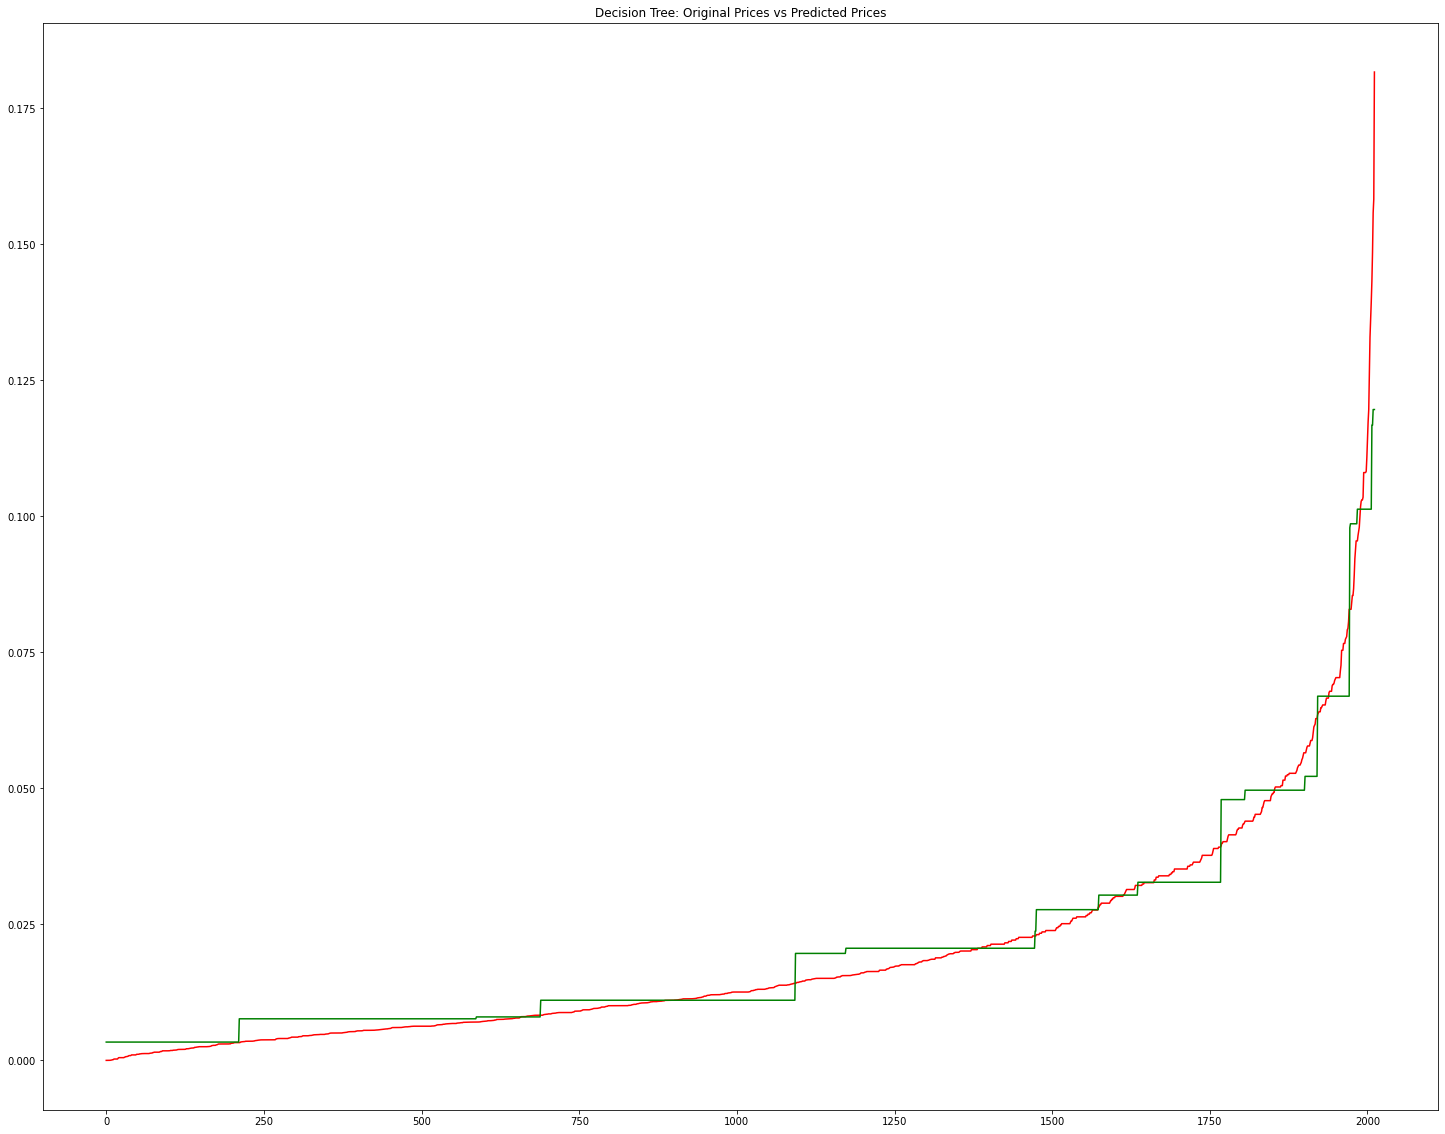

In [59]:
x = np.sort(y_test)[:-7]
y = np.sort(y_predict_DT)[:-7]
plt.figure(figsize=(25,20))
plt.plot(x, label = "Actual", color="red")
plt.plot(y, label = "Pridected", color='green')
plt.title("Decision Tree: Original Prices vs Predicted Prices")
# plt.savefig('../Results/Decision-Tree-Predicted-vs-Original-Line', dpi=500, bbox_inches='tight')

### 3.5 Random Forest

#### 3.5.1 Random Forest: Model Training

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
RF = RandomForestRegressor(n_estimators=280, random_state=0)
RF.fit(X_train, y_train)

RandomForestRegressor(n_estimators=280, random_state=0)

#### 3.5.2 Random Forest: Testing

In [62]:
y_predict_RF = RF.predict(X_test)
print(y_predict_RF)

[0.00745275 0.00306018 0.03548897 ... 0.00696061 0.01013348 0.01104497]


#### 3.5.3 Random Forest: Score / Results

In [63]:
RF_score = RF.score(X_test, y_test)
print(RF_score*100)

78.27564724091043


In [64]:
R2_Score_RF = r2_score(y_test, y_predict_RF)*100
MAE_RF = metrics.mean_absolute_error(y_test, y_predict_RF)*100
MSE_RF = metrics.mean_squared_error(y_test, y_predict_RF)*100
RSME_RF = np.sqrt(metrics.mean_squared_error(y_test, y_predict_RF))*100
print('R2 Score Linear Regression', R2_Score_RF)
print('MAE Ridge Regression:', MAE_RF)
print('MSE Ridge Regression:', MSE_RF)
print('RMSE Ridge Regression:', RSME_RF)

R2 Score Linear Regression 78.27564724091043
MAE Ridge Regression: 0.4297502377213002
MSE Ridge Regression: 0.014960751520229574
RMSE Ridge Regression: 1.2231415094023084


Text(0.5, 1.0, 'Random Forest: Original Prices vs Predicted Prices')

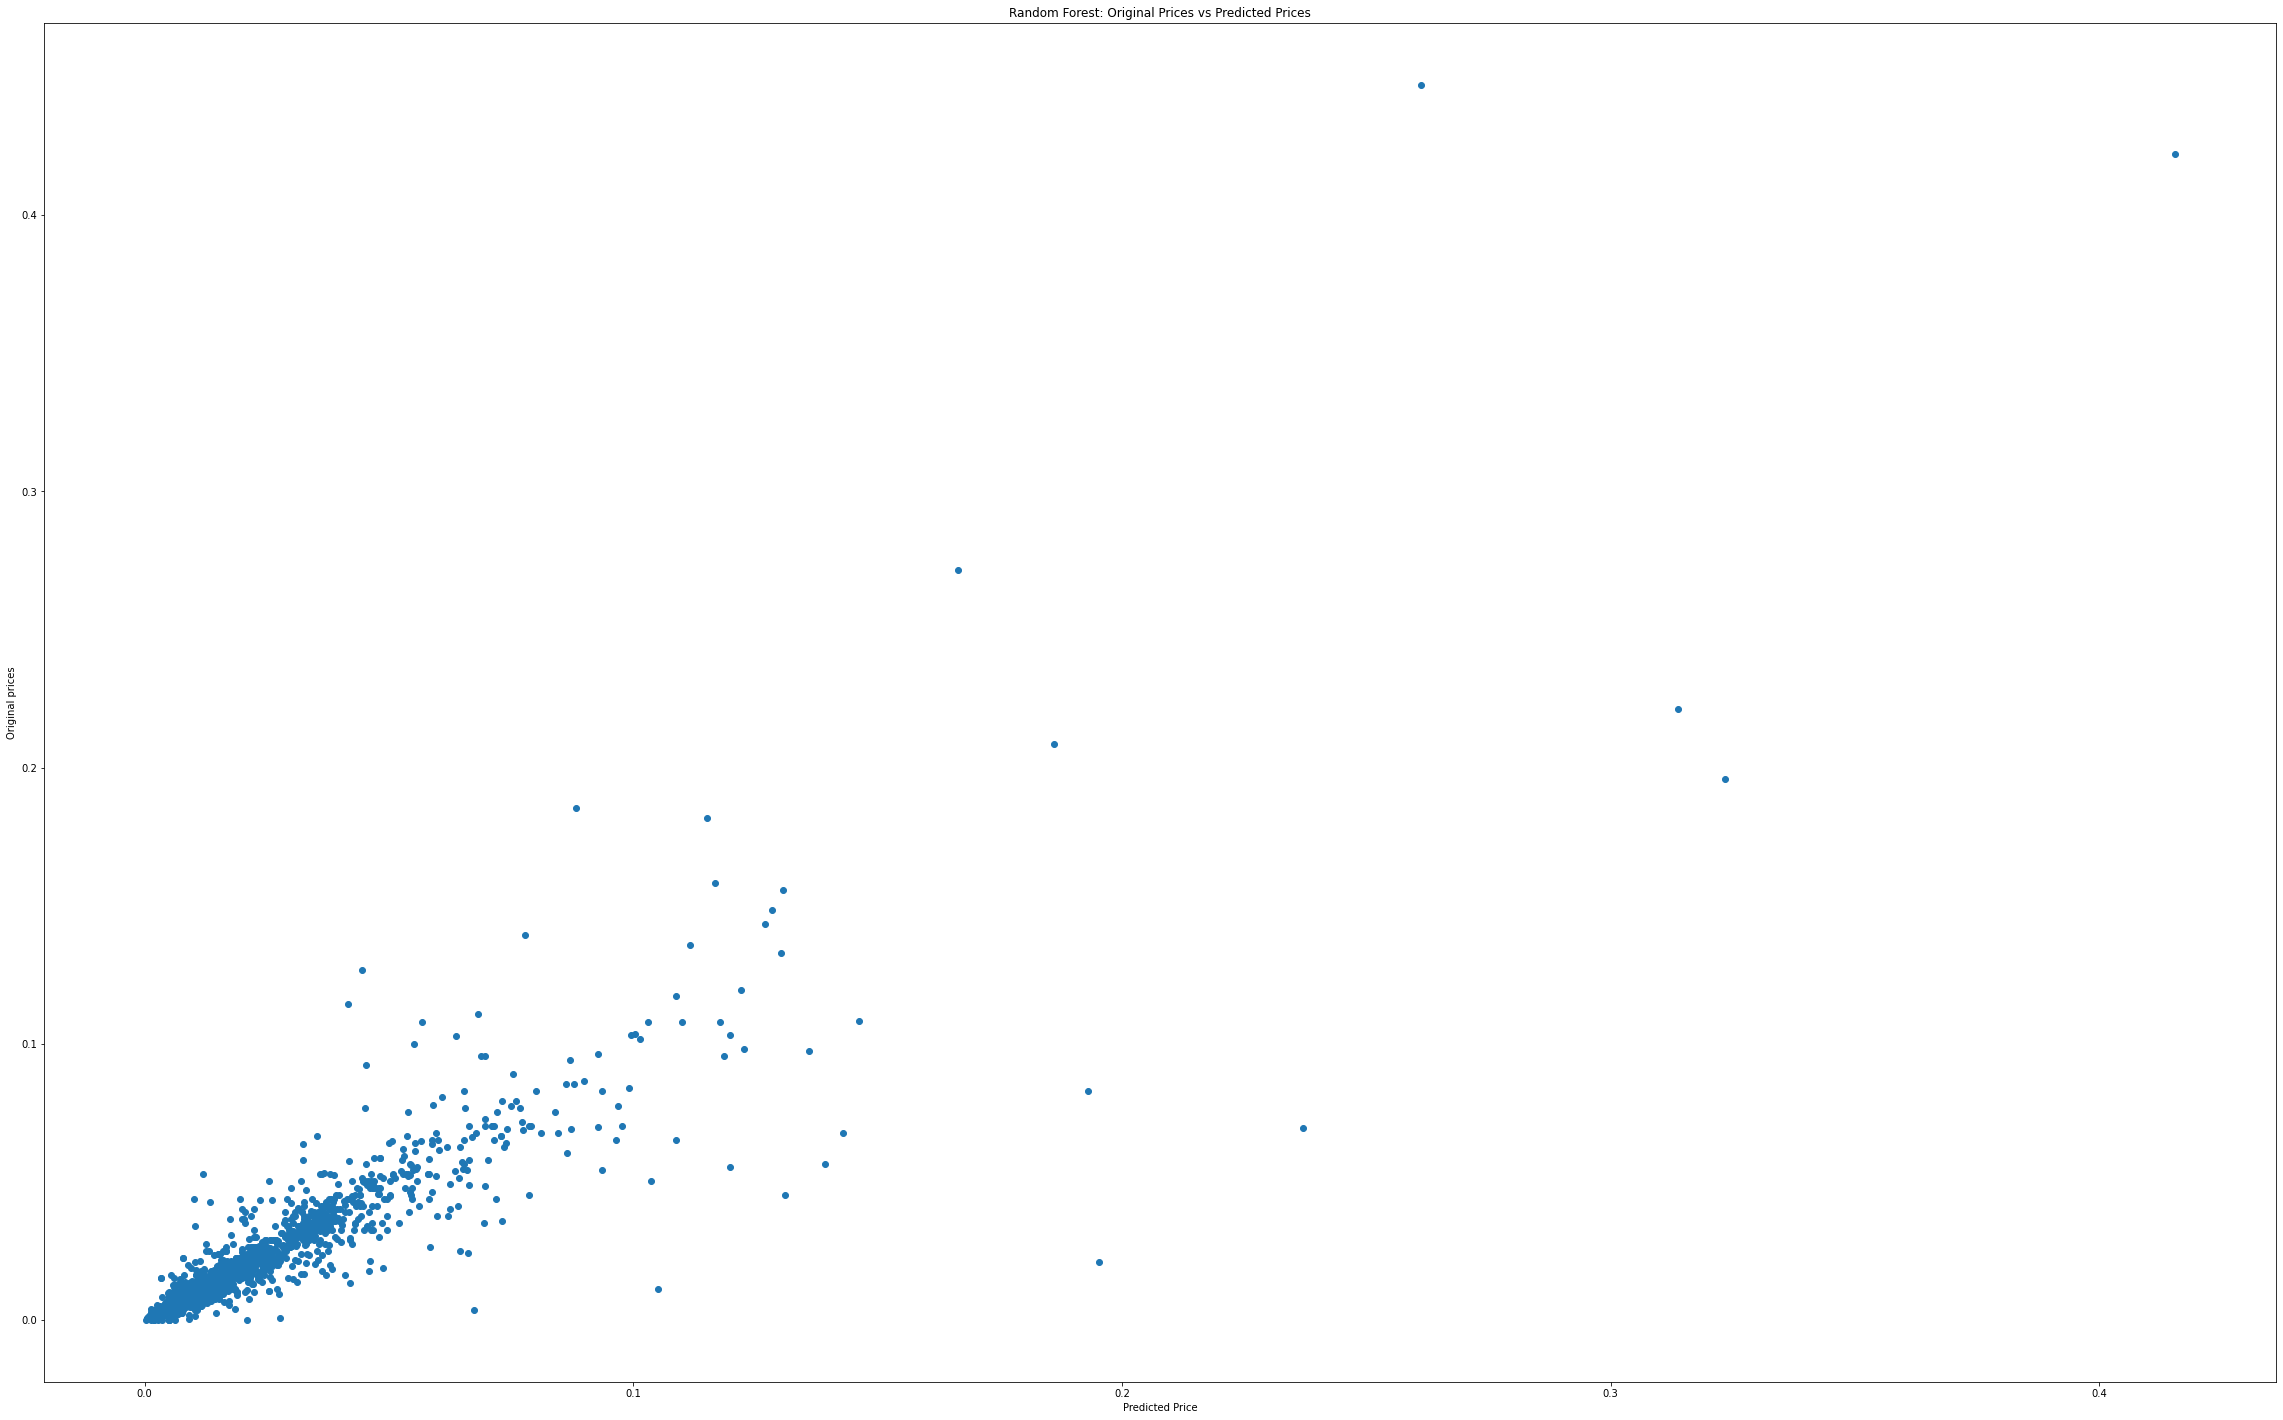

In [65]:
plt.figure(figsize= (40,25))
plt.scatter(y_predict_RF, y_test)
# plt.plot(y_test, LR.predict(X_test), color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Original prices")
plt.title("Random Forest: Original Prices vs Predicted Prices")
# plt.show()
# plt.savefig('../Results/Random-Forest-Predicted-vs-Original-Scattered', dpi=500, bbox_inches='tight')

In [66]:
# Confusion Matrix<br>
# cm_RF = confusion_matrix(y_test, y_predict_RF)<br>
# cm_RF

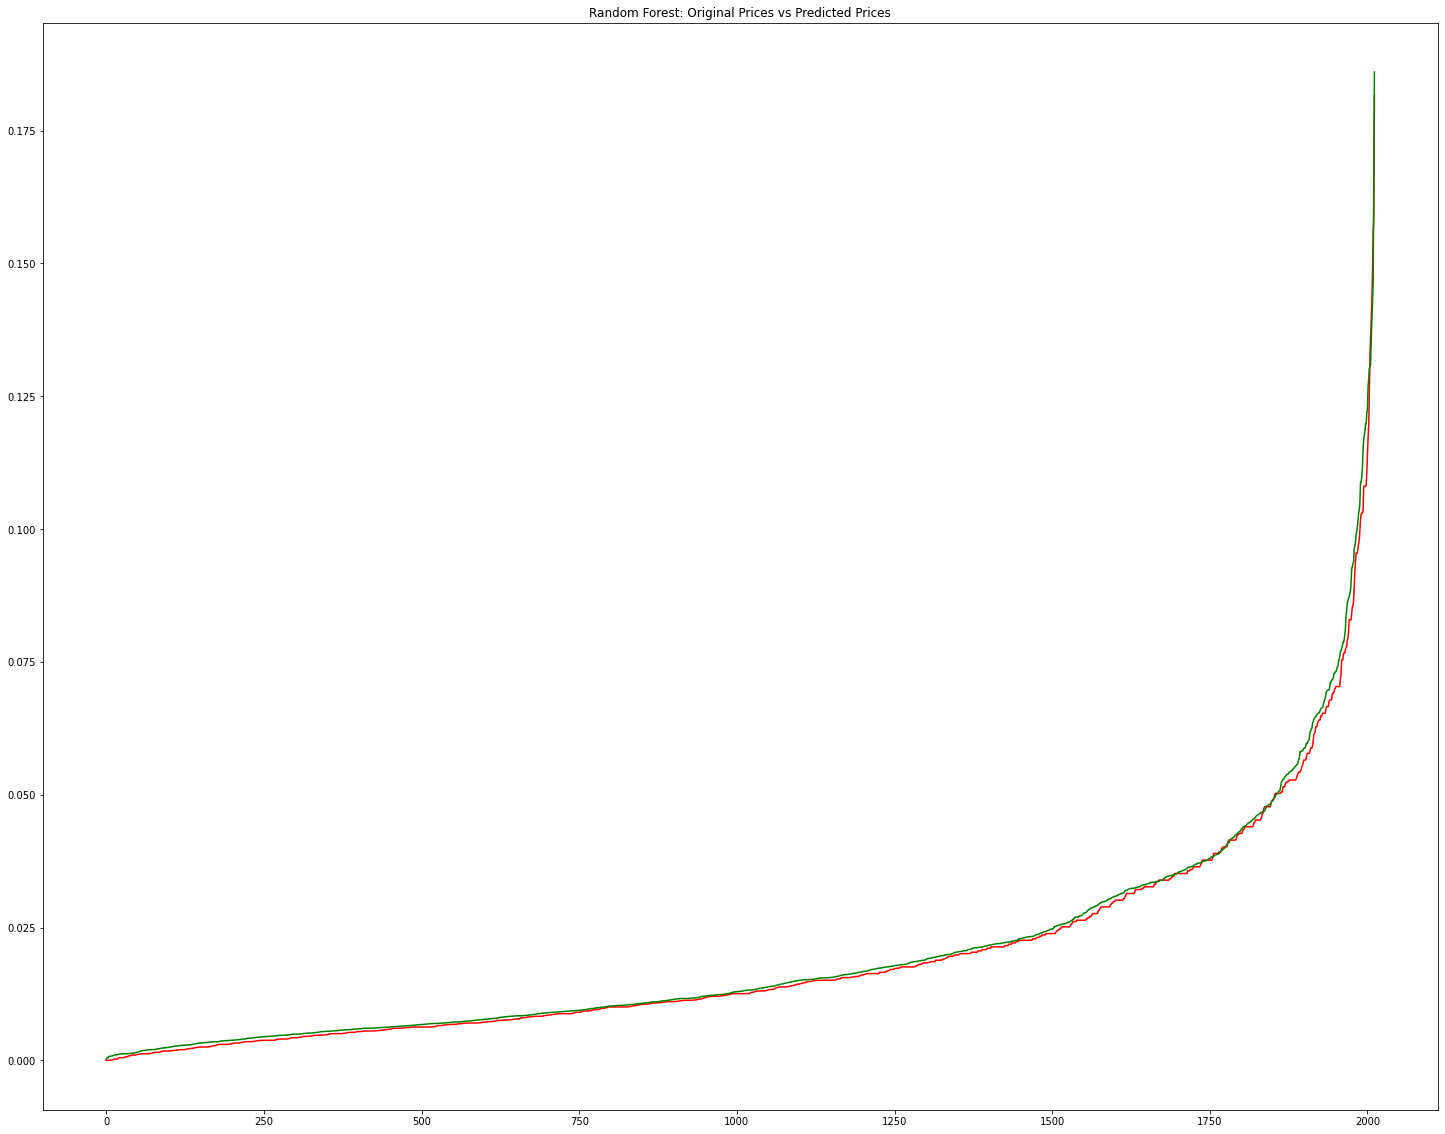

In [67]:
x = np.sort(y_test)[:-7]
y = np.sort(y_predict_RF)[:-7]
plt.figure(figsize=(25,20))
plt.plot(x, label = "Actual", color="red")
plt.plot(y, label = "Pridected", color='green')
plt.title("Random Forest: Original Prices vs Predicted Prices")
plt.savefig('../Results/Random-Forest-Predicted-vs-Original-Line', dpi=500, bbox_inches='tight')

### 3.6 K Nearest Neighbour: KNN

#### 3.6.1 KNN: Model Training

In [68]:
from sklearn.neighbors import KNeighborsRegressor

In [69]:
KNR = KNeighborsRegressor(100)
KNR.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=100)

#### 3.6.2 KNN: Testing

In [70]:
y_predict_KNR = KNR.predict(X_test)
print(y_predict_KNR)

[0.01062482 0.00794894 0.02294523 ... 0.02135741 0.02415626 0.02149698]


#### 3.6.3 KNN: Score / Results

In [71]:
KNR_score = KNR.score(X_test, y_test)
print(KNR_score*100)

17.27145969284741


In [72]:
R2_Score_KNR = r2_score(y_test, y_predict_KNR)*100
MAE_KNR = metrics.mean_absolute_error(y_test, y_predict_KNR)*100
MSE_KNR = metrics.mean_squared_error(y_test, y_predict_KNR)*100
RSME_KNR = np.sqrt(metrics.mean_squared_error(y_test, y_predict_KNR))*100
print('R2 Score Linear Regression', R2_Score_KNR)
print('MAE Ridge Regression:', MAE_KNR)
print('MSE Ridge Regression:', MSE_KNR)
print('RMSE Ridge Regression:', RSME_KNR)

R2 Score Linear Regression 17.27145969284741
MAE Ridge Regression: 1.238818786831632
MSE Ridge Regression: 0.056972060290668716
RMSE Ridge Regression: 2.3868820727188997


Text(0.5, 1.0, 'KNN: Original Prices vs Predicted Prices')

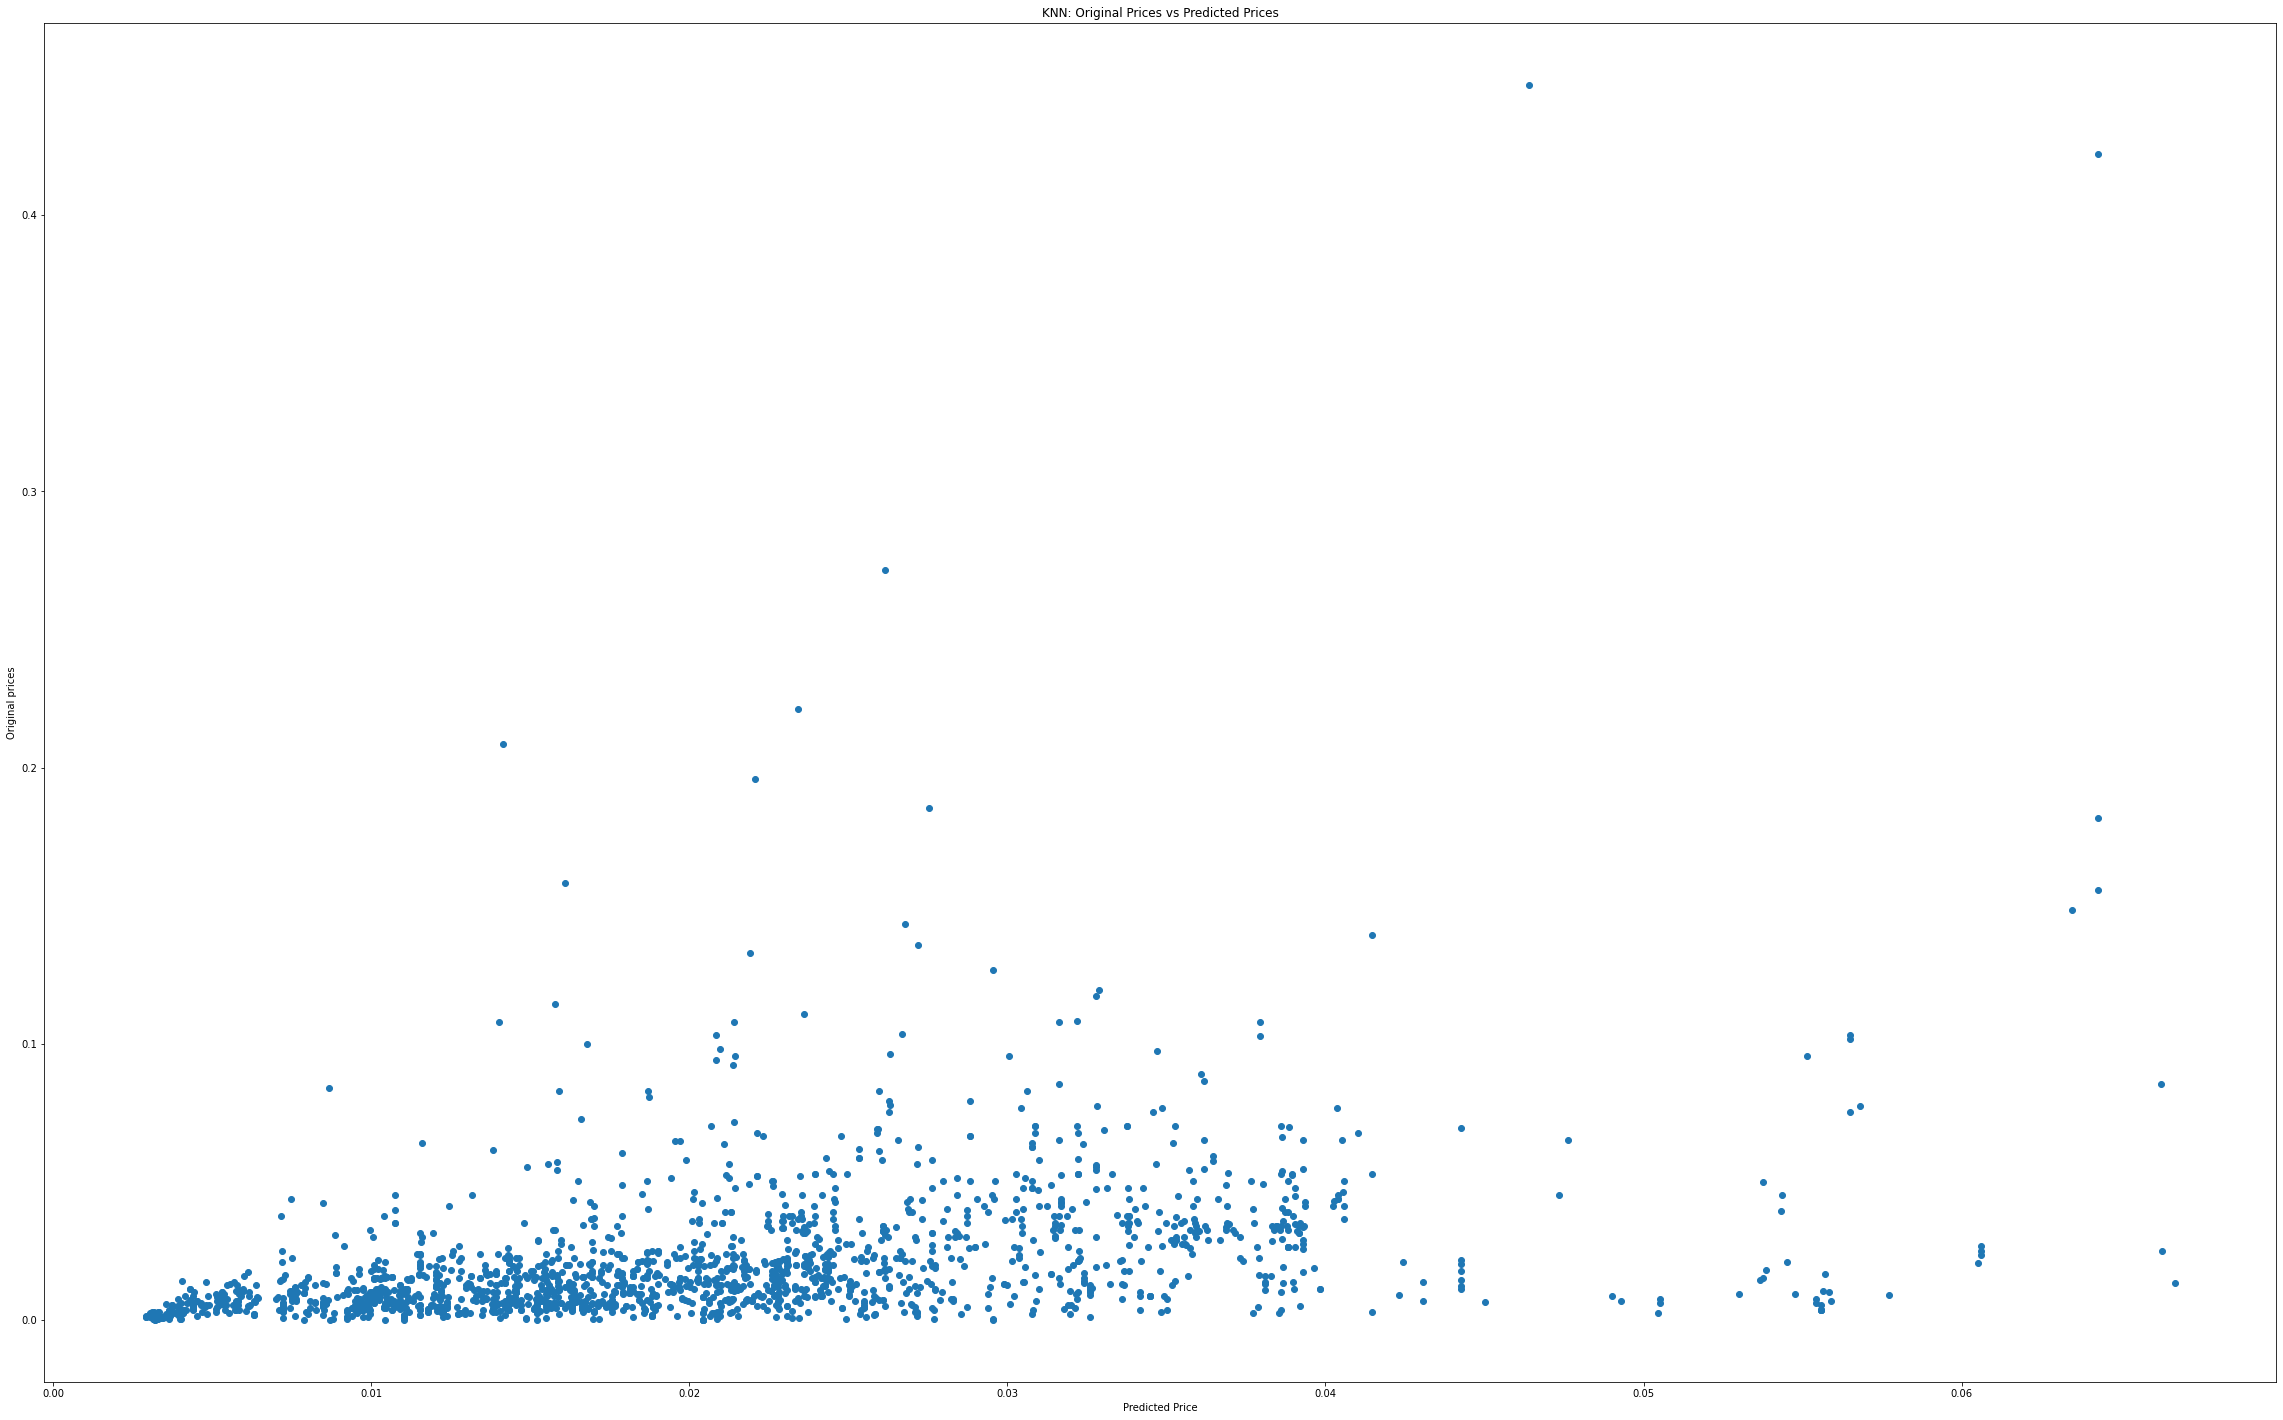

In [73]:
plt.figure(figsize= (40,25))
plt.scatter(y_predict_KNR, y_test)
# plt.plot(y_test, LR.predict(X_test), color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Original prices")
plt.title("KNN: Original Prices vs Predicted Prices")
# plt.show()
# plt.savefig('../Results/KNN-Predicted-vs-Original-Scattered', dpi=500, bbox_inches='tight')

Text(0.5, 1.0, 'KNN: Original Prices vs Predicted Prices')

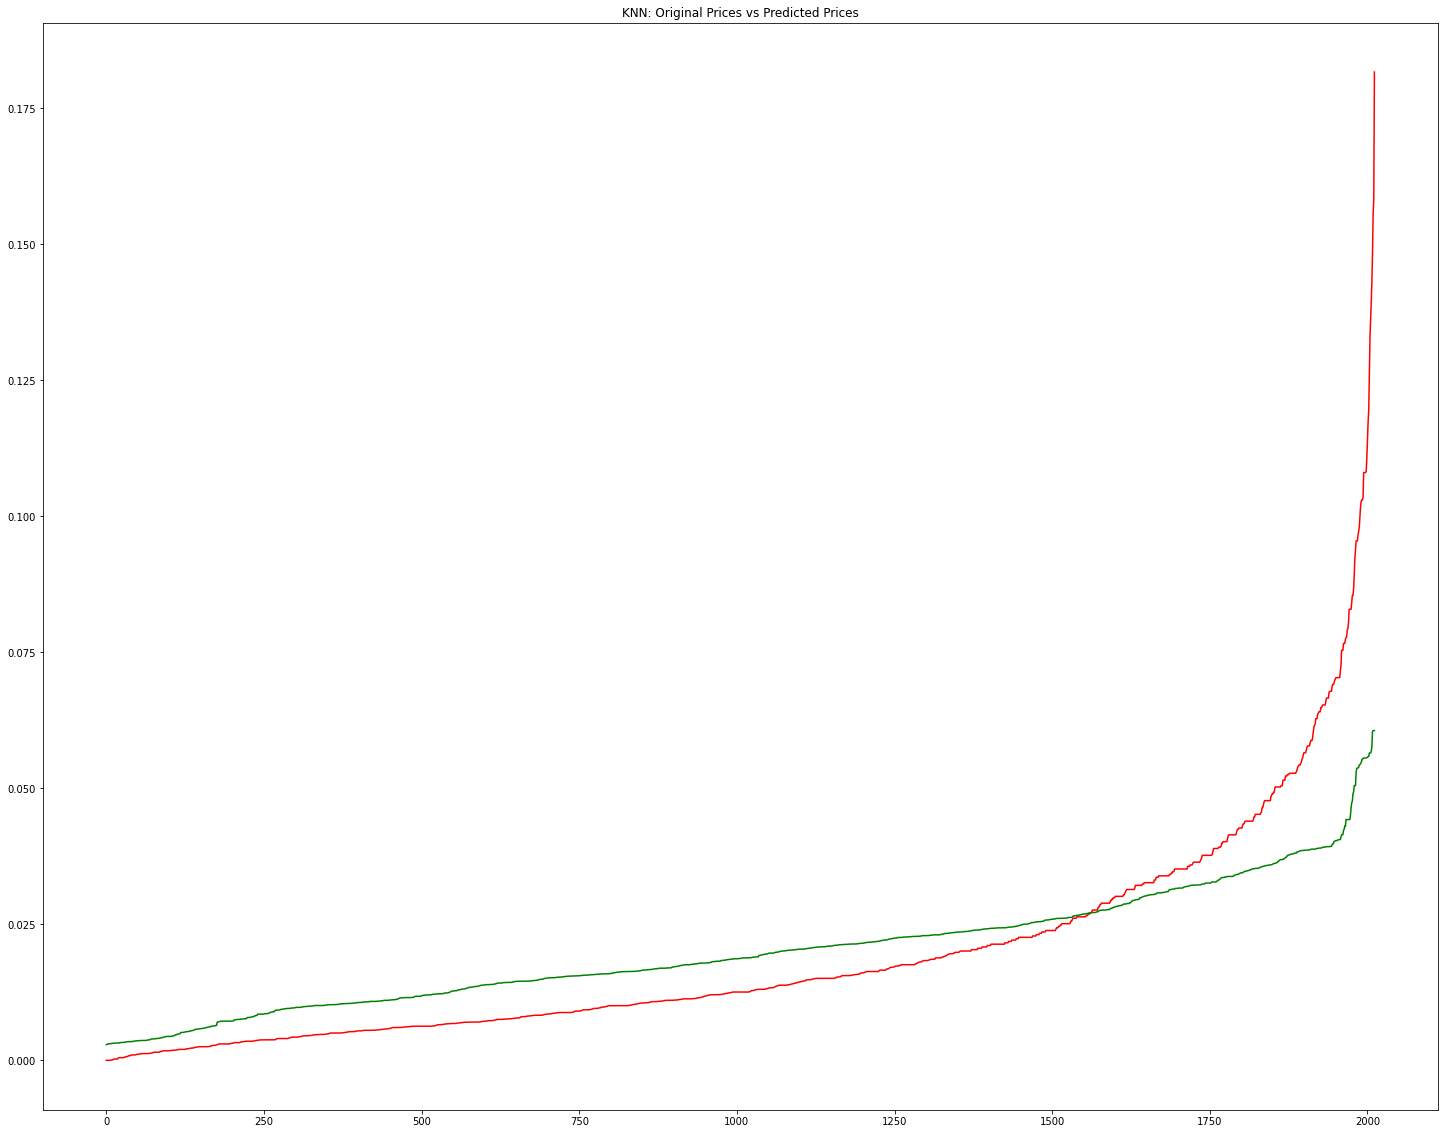

In [74]:
x = np.sort(y_test)[:-7]
y = np.sort(y_predict_KNR)[:-7]
plt.figure(figsize=(25,20))
plt.plot(x, label = "Actual", color="red")
plt.plot(y, label = "Pridected", color='green')
plt.title("KNN: Original Prices vs Predicted Prices")
# plt.savefig('../Results/KNN-Predicted-vs-Original-Line', dpi=500, bbox_inches='tight')

### 3.7 Support Vector Machine: SVM

#### 3.7.1 SVM: Model Training

In [75]:
from sklearn.svm import SVR

In [76]:
SVM = SVR()
SVM.fit(X_train,y_train)

SVR()

#### 3.7.2 SVM: Testing

In [77]:
y_predict_SVM = SVM.predict(X_test)
print(y_predict_SVM)

[0.10051336 0.10069072 0.10307294 ... 0.09999499 0.1013074  0.10095339]


#### 3.7.3 SVM: Score / Results

In [78]:
SVM_score = SVM.score(X_test, y_test)
print(SVM_score*100)

-942.434270841452


In [79]:
R2_Score_SVM = r2_score(y_test, y_predict_SVM)*100
MAE_SVM = metrics.mean_absolute_error(y_test, y_predict_SVM)*100
MSE_SVM = metrics.mean_squared_error(y_test, y_predict_SVM)*100
RSME_SVM = np.sqrt(metrics.mean_squared_error(y_test, y_predict_SVM))*100
print('R2 Score Linear Regression', R2_Score_SVM)
print('MAE Ridge Regression:', MAE_SVM)
print('MSE Ridge Regression:', MSE_SVM)
print('RMSE Ridge Regression:', RSME_SVM)

R2 Score Linear Regression -942.434270841452
MAE Ridge Regression: 8.238075974919026
MSE Ridge Regression: 0.7178856040120865
RMSE Ridge Regression: 8.472813015829432


Text(0.5, 1.0, 'Support Vector Machine: Original Prices vs Predicted Prices')

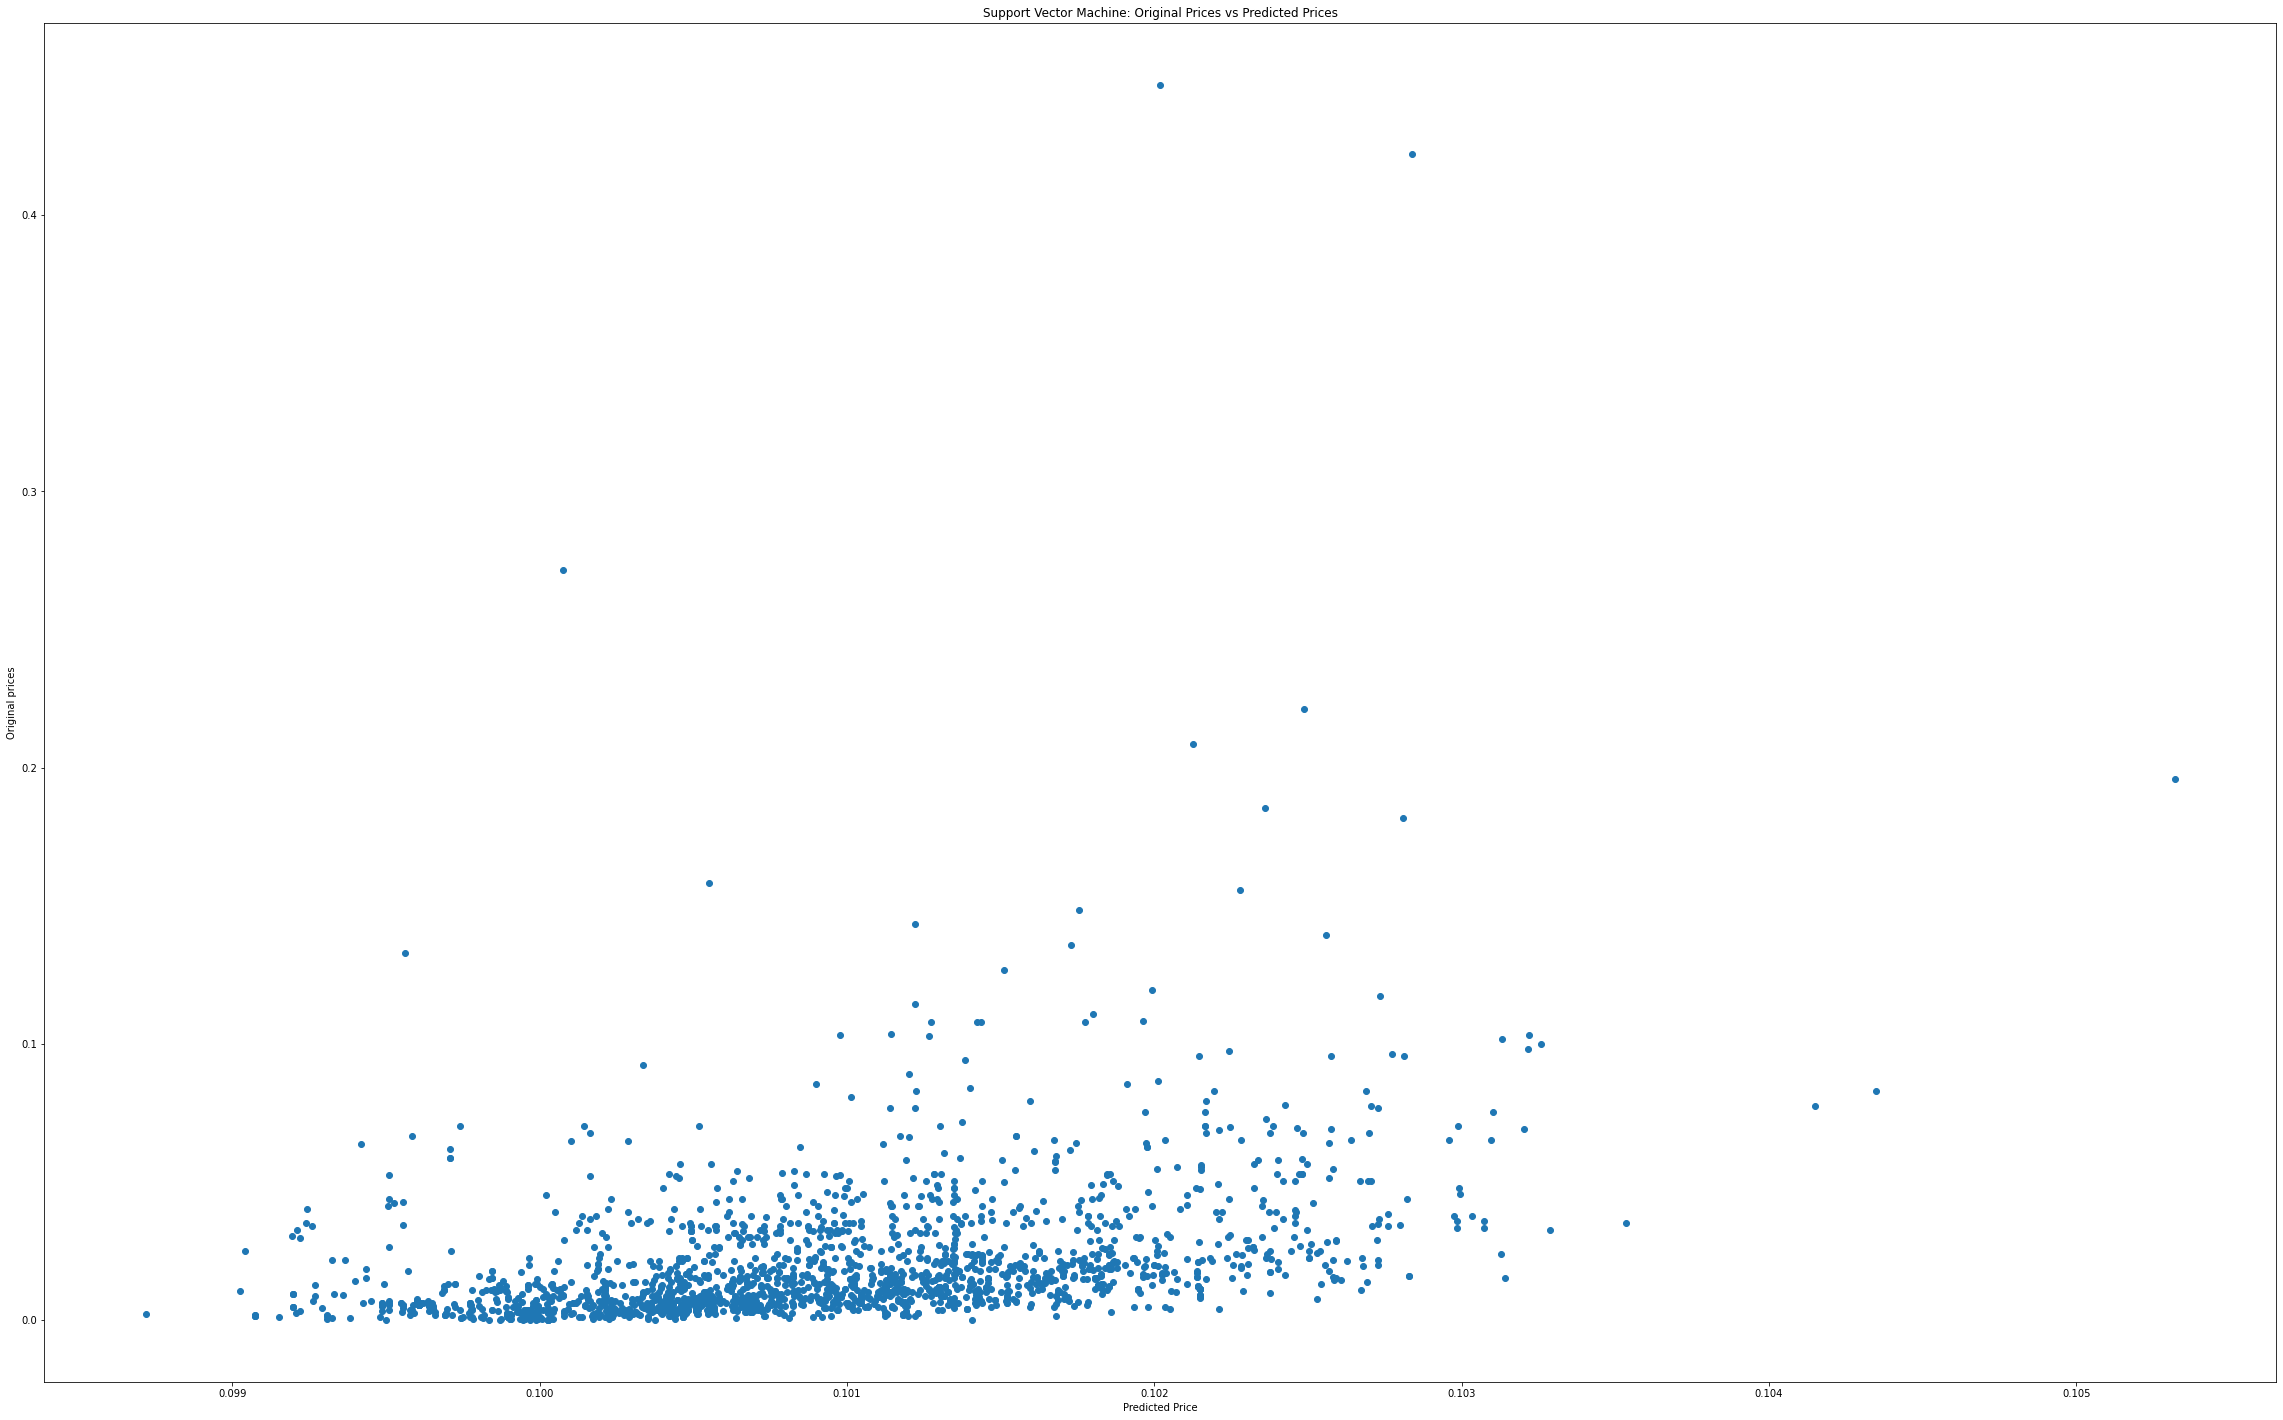

In [80]:
plt.figure(figsize= (40,25))
plt.scatter(y_predict_SVM, y_test)
# plt.plot(y_test, LR.predict(X_test), color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Original prices")
plt.title("Support Vector Machine: Original Prices vs Predicted Prices")
# plt.show()
# plt.savefig('../Results/Support-Vector-Machine-Predicted-vs-Original-Scattered', dpi=500, bbox_inches='tight')

Text(0.5, 1.0, 'Support Vector Machine: Original Prices vs Predicted Prices')

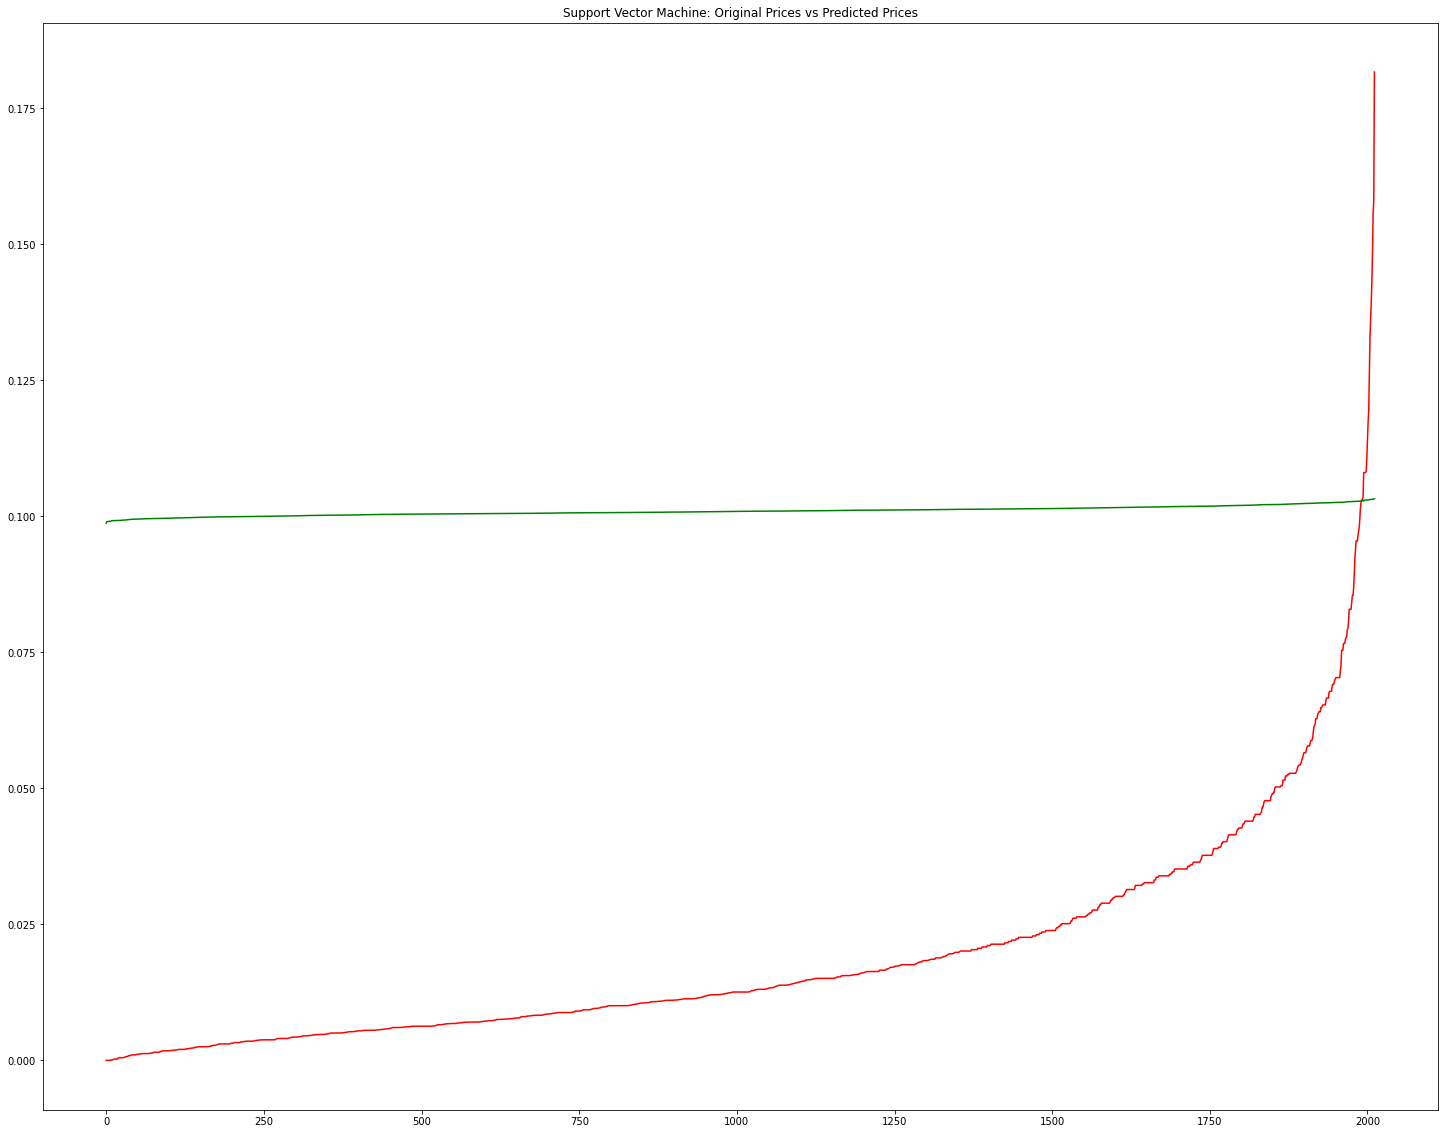

In [81]:
x = np.sort(y_test)[:-7]
y = np.sort(y_predict_SVM)[:-7]
plt.figure(figsize=(25,20))
plt.plot(x, label = "Actual", color="red")
plt.plot(y, label = "Pridected", color='green')
plt.title("Support Vector Machine: Original Prices vs Predicted Prices")
# plt.savefig('../Results/Support-Vector-Machine-Predicted-vs-Original-Line', dpi=500, bbox_inches='tight')

### 3.8 Extreme Gradient Boost: XGBoost

#### 3.8.1 XGBoost: Model Training

In [82]:
from xgboost import XGBRegressor

In [83]:
XGB = XGBRegressor()
XGB.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

#### 3.8.2 XGBoost: Testing

In [84]:
y_predict_XGB = XGB.predict(X_test)
print(y_predict_XGB)

[0.00523996 0.00330429 0.03560577 ... 0.00585762 0.01133295 0.00994269]


#### 3.8.3 XGBoost: Score / Results

In [85]:
XGB_score = XGB.score(X_test, y_test)
print(XGB_score*100)

81.2145833470149


In [86]:
R2_Score_XGB = r2_score(y_test, y_predict_XGB)*100
MAE_XGB = metrics.mean_absolute_error(y_test, y_predict_XGB)*100
MSE_XGB = metrics.mean_squared_error(y_test, y_predict_XGB)*100
RSME_XGB = np.sqrt(metrics.mean_squared_error(y_test, y_predict_XGB))*100
print('R2 Score Linear Regression', R2_Score_XGB)
print('MAE Ridge Regression:', MAE_XGB)
print('MSE Ridge Regression:', MSE_XGB)
print('RMSE Ridge Regression:', RSME_XGB)

R2 Score Linear Regression 81.2145833470149
MAE Ridge Regression: 0.44450137266451445
MSE Ridge Regression: 0.012936815833636414
RMSE Ridge Regression: 1.137401241147398


Text(0.5, 1.0, 'XGBoost: Original Prices vs Predicted Prices')

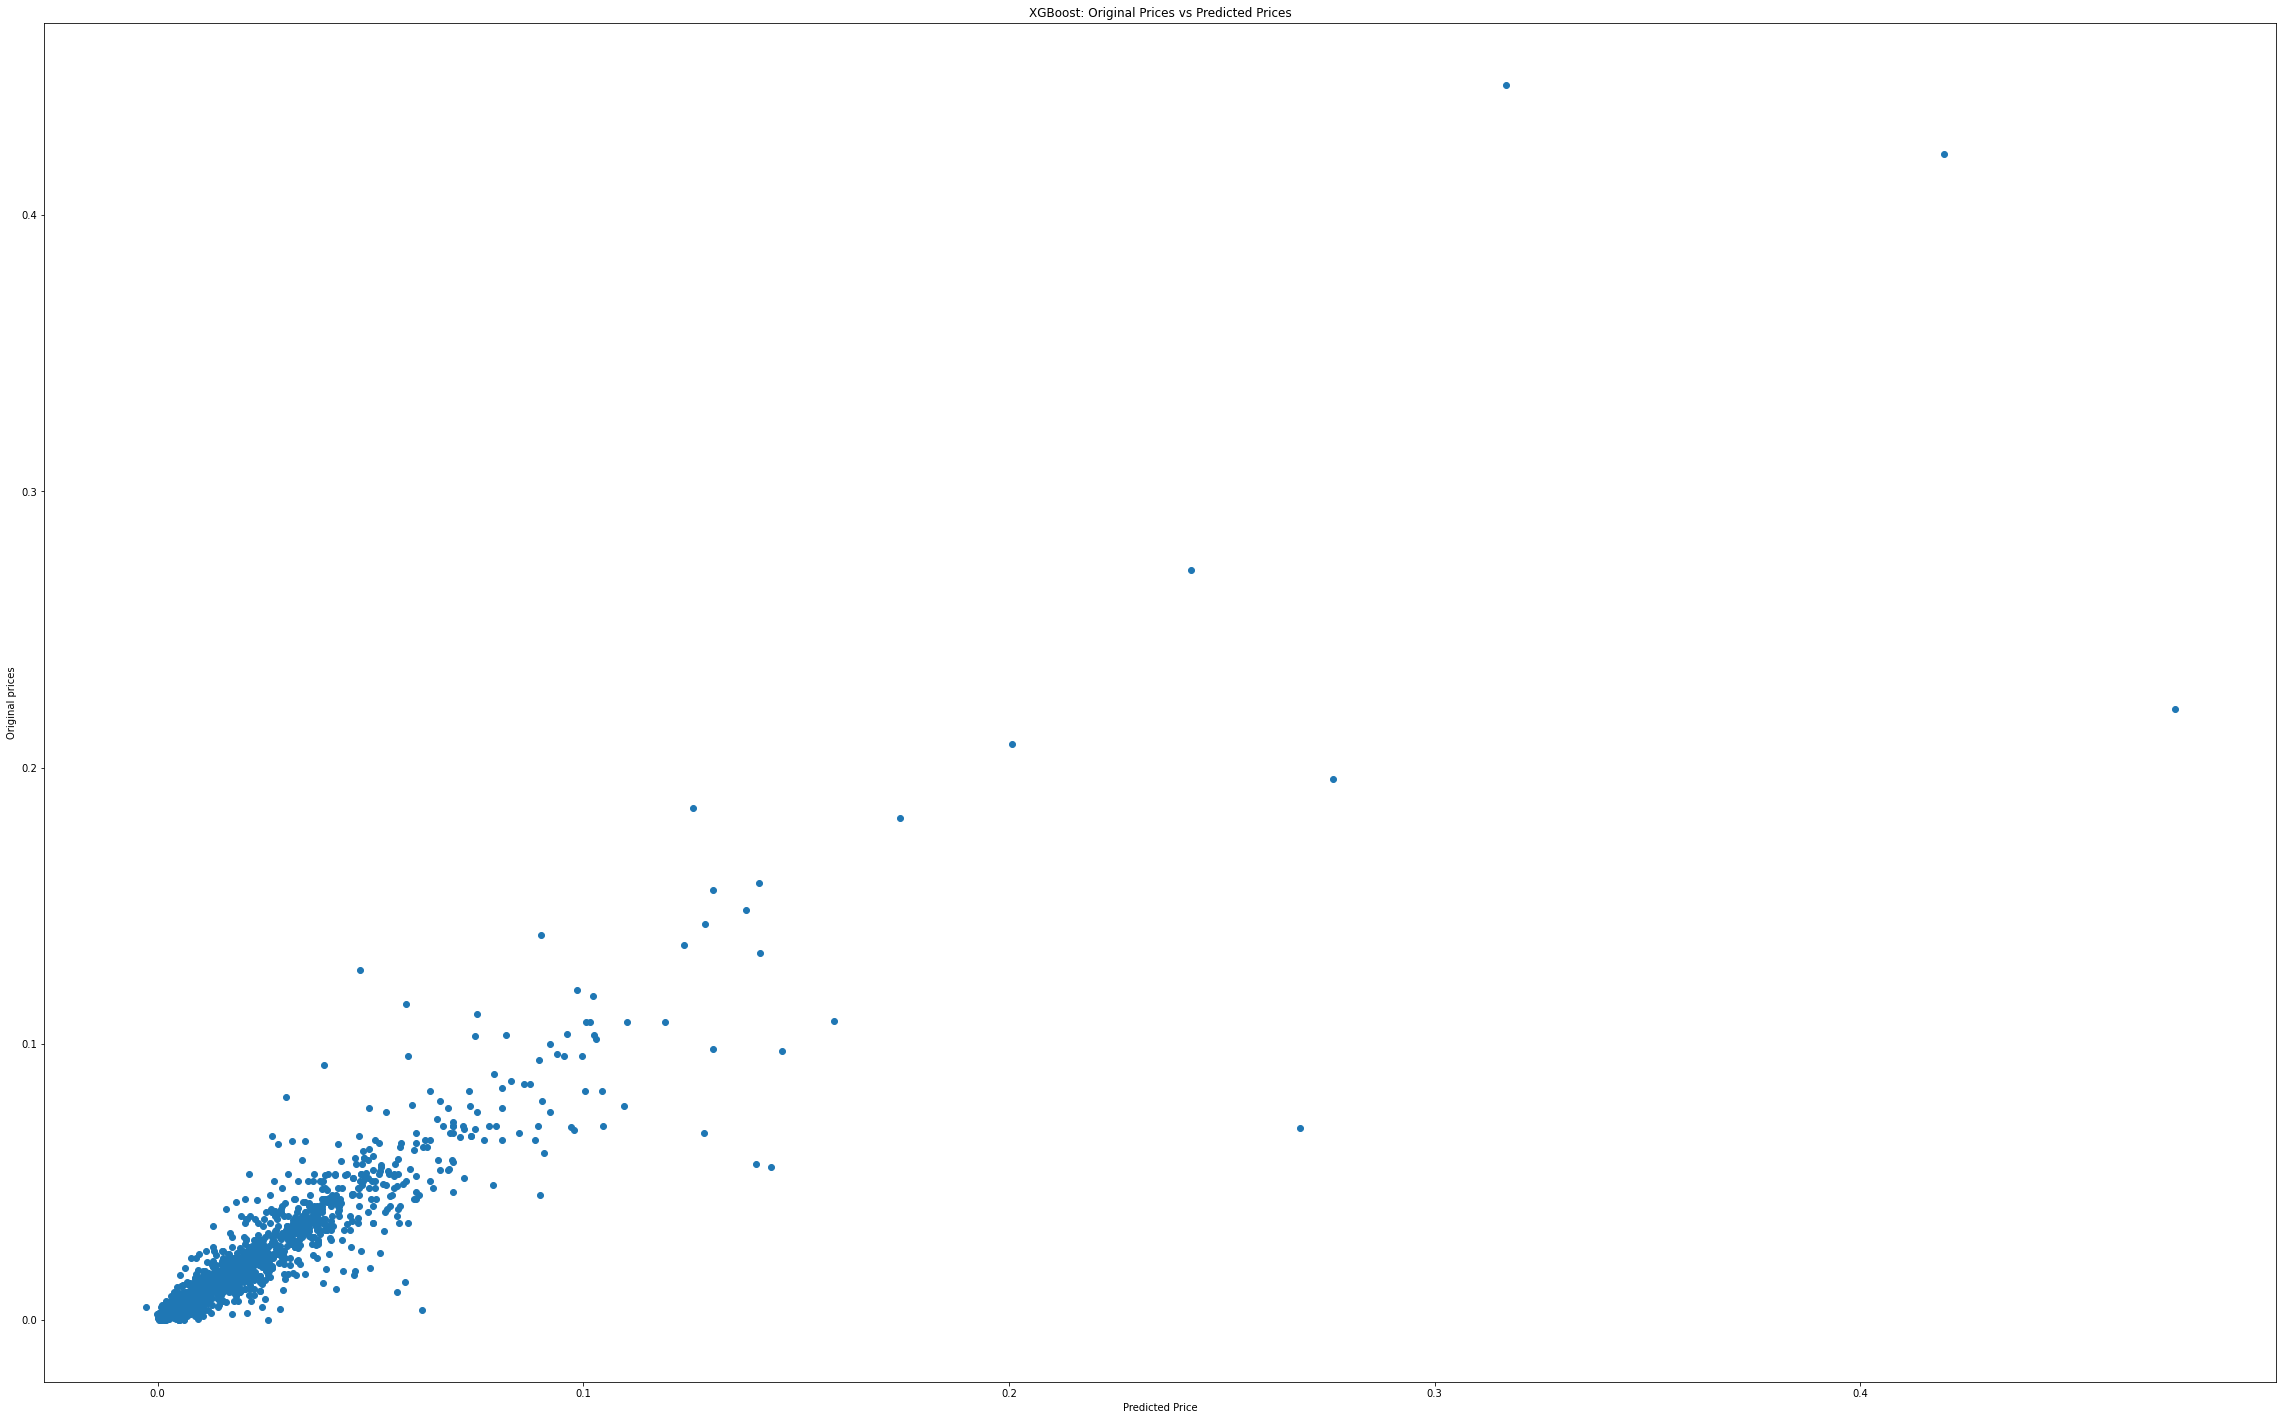

In [87]:
plt.figure(figsize= (40,25))
plt.scatter(y_predict_XGB, y_test)
# plt.plot(y_test, LR.predict(X_test), color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Original prices")
plt.title("XGBoost: Original Prices vs Predicted Prices")
# plt.show()
# plt.savefig('../Results/XGBoost-Predicted-vs-Original-Scattered', dpi=500, bbox_inches='tight')

Text(0.5, 1.0, 'XGBoost: Original Prices vs Predicted Prices')

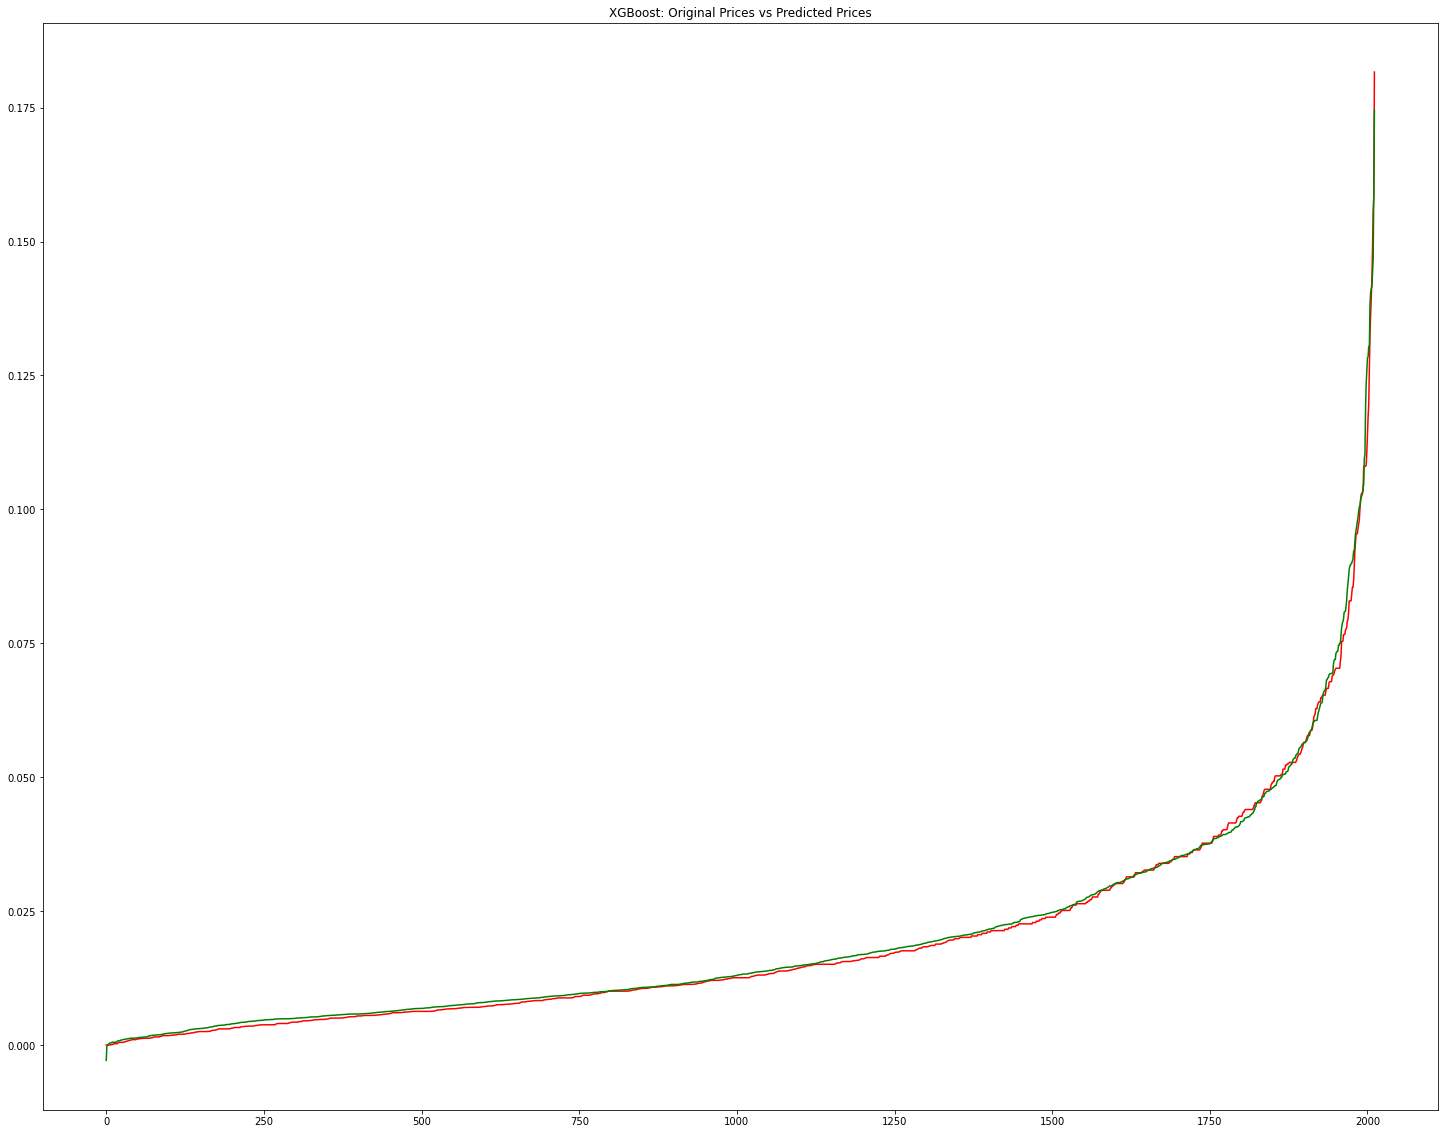

In [88]:
x = np.sort(y_test)[:-7]
y = np.sort(y_predict_XGB)[:-7]
plt.figure(figsize=(25,20))
plt.plot(x, label = "Actual", color="red")
plt.plot(y, label = "Pridected", color='green')
plt.title("XGBoost: Original Prices vs Predicted Prices")
# plt.savefig('../Results/XGBoost-Predicted-vs-Original-Line', dpi=500, bbox_inches='tight')

## 4 Results

### 4.1 Score Comparision

In [89]:
All_result = pd.DataFrame.from_dict({"Models" : ["Linear Regression", "Ridge Regression", "Lasso Regression", "Decision Tree", "Random Forest", "K Nearest Neighbour", "Support Vector Machine", "XGBoost"],
                                    "Score": [LR_score, RR_score, Lasso_R_score, DT_score, RF_score, KNR_score, SVM_score, XGB_score],
                                    "Mean Absolute Error" : [MAE_LR, MAE_RR, MAE_Lasso_R, MAE_DT, MAE_RF, MAE_KNR, MAE_SVM, MAE_XGB],
                                    "Mean Square Error" : [MSE_LR, MSE_RR, MSE_Lasso_R, MSE_DT, MSE_RF, MSE_KNR, MSE_SVM, MSE_XGB],
                                    "Route Mean Square Error" : [RSME_LR, RSME_RR, RSME_Lasso_R, RSME_DT, RSME_RF, RSME_KNR, RSME_SVM, RSME_XGB]
                                    })
All_result.head(8)

,Models,Score,Mean Absolute Error,Mean Square Error,Route Mean Square Error
0,Linear Regression,0.517899,1.044337,0.033201,1.822101
1,Ridge Regression,0.525302,1.030370,0.032691,1.808056
2,Lasso Regression,-0.001187,1.568261,0.068948,2.625795
3,Decision Tree,0.727695,0.752836,0.018753,1.369403
4,Random Forest,0.782756,0.429750,0.014961,1.223142
5,K Nearest Neighbour,0.172715,1.238819,0.056972,2.386882
6,Support Vector Machine,-9.424343,8.238076,0.717886,8.472813
7,XGBoost,0.812146,0.444501,0.012937,1.137401


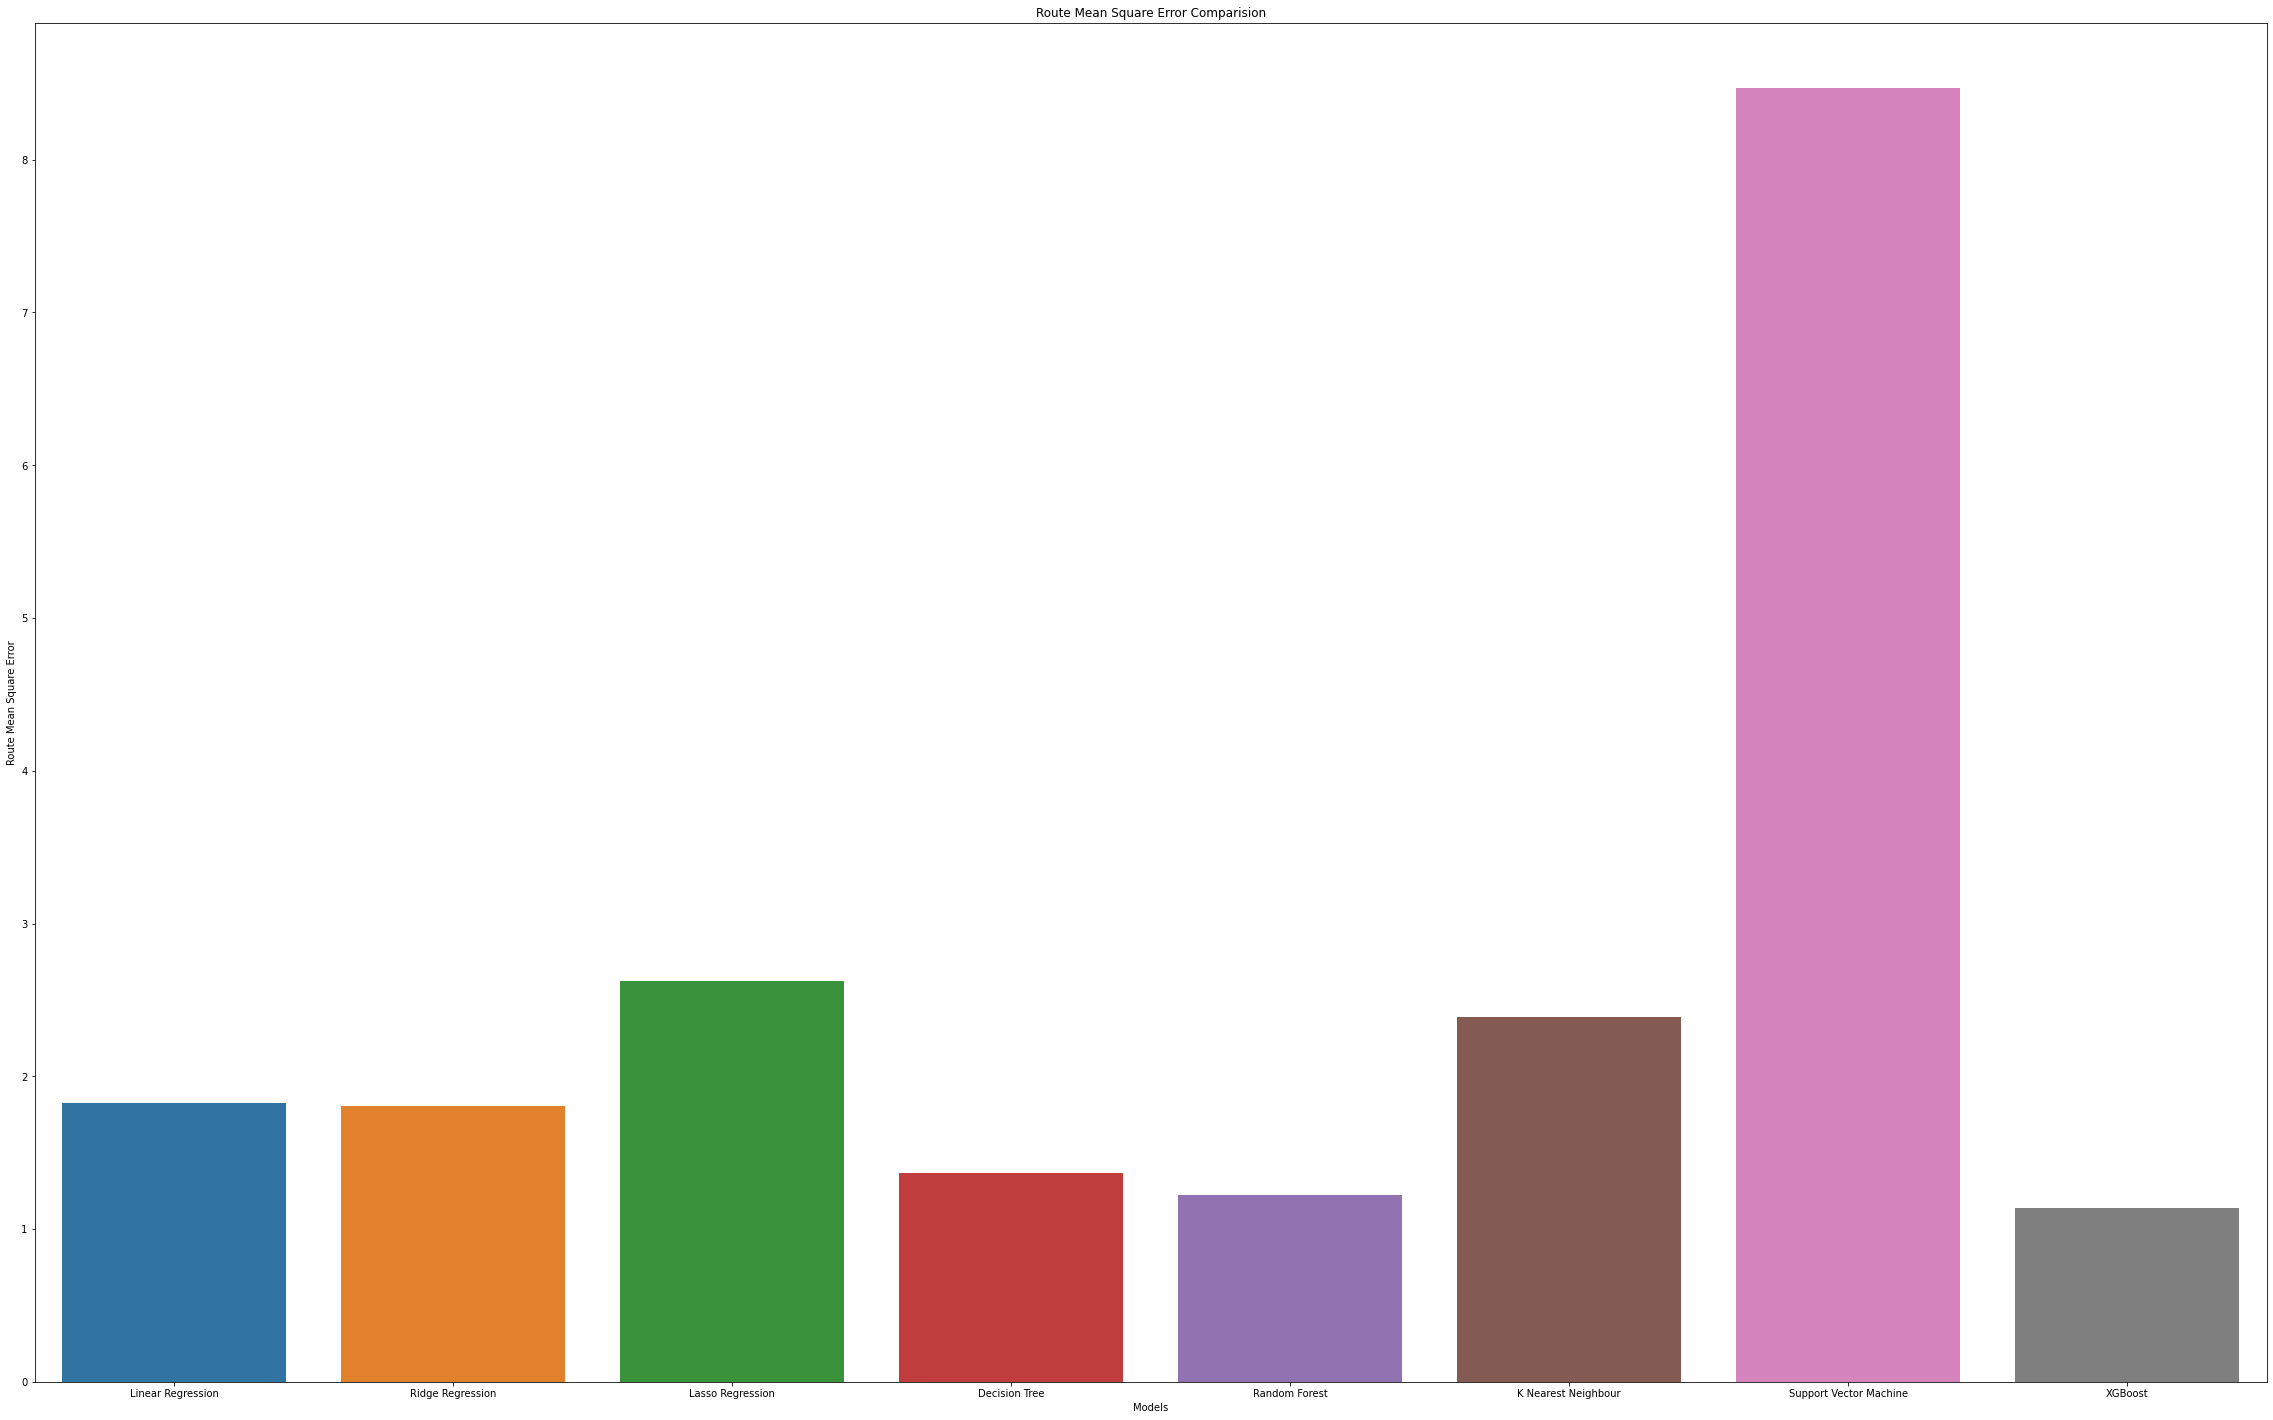

In [90]:
plt.figure(figsize= (40,25))
sns.barplot(x='Models',y='Route Mean Square Error',data=All_result)
plt.title('Route Mean Square Error Comparision')
plt.savefig('../Results/Route-Mean-Square-Error-Comparision', dpi=500, bbox_inches='tight')

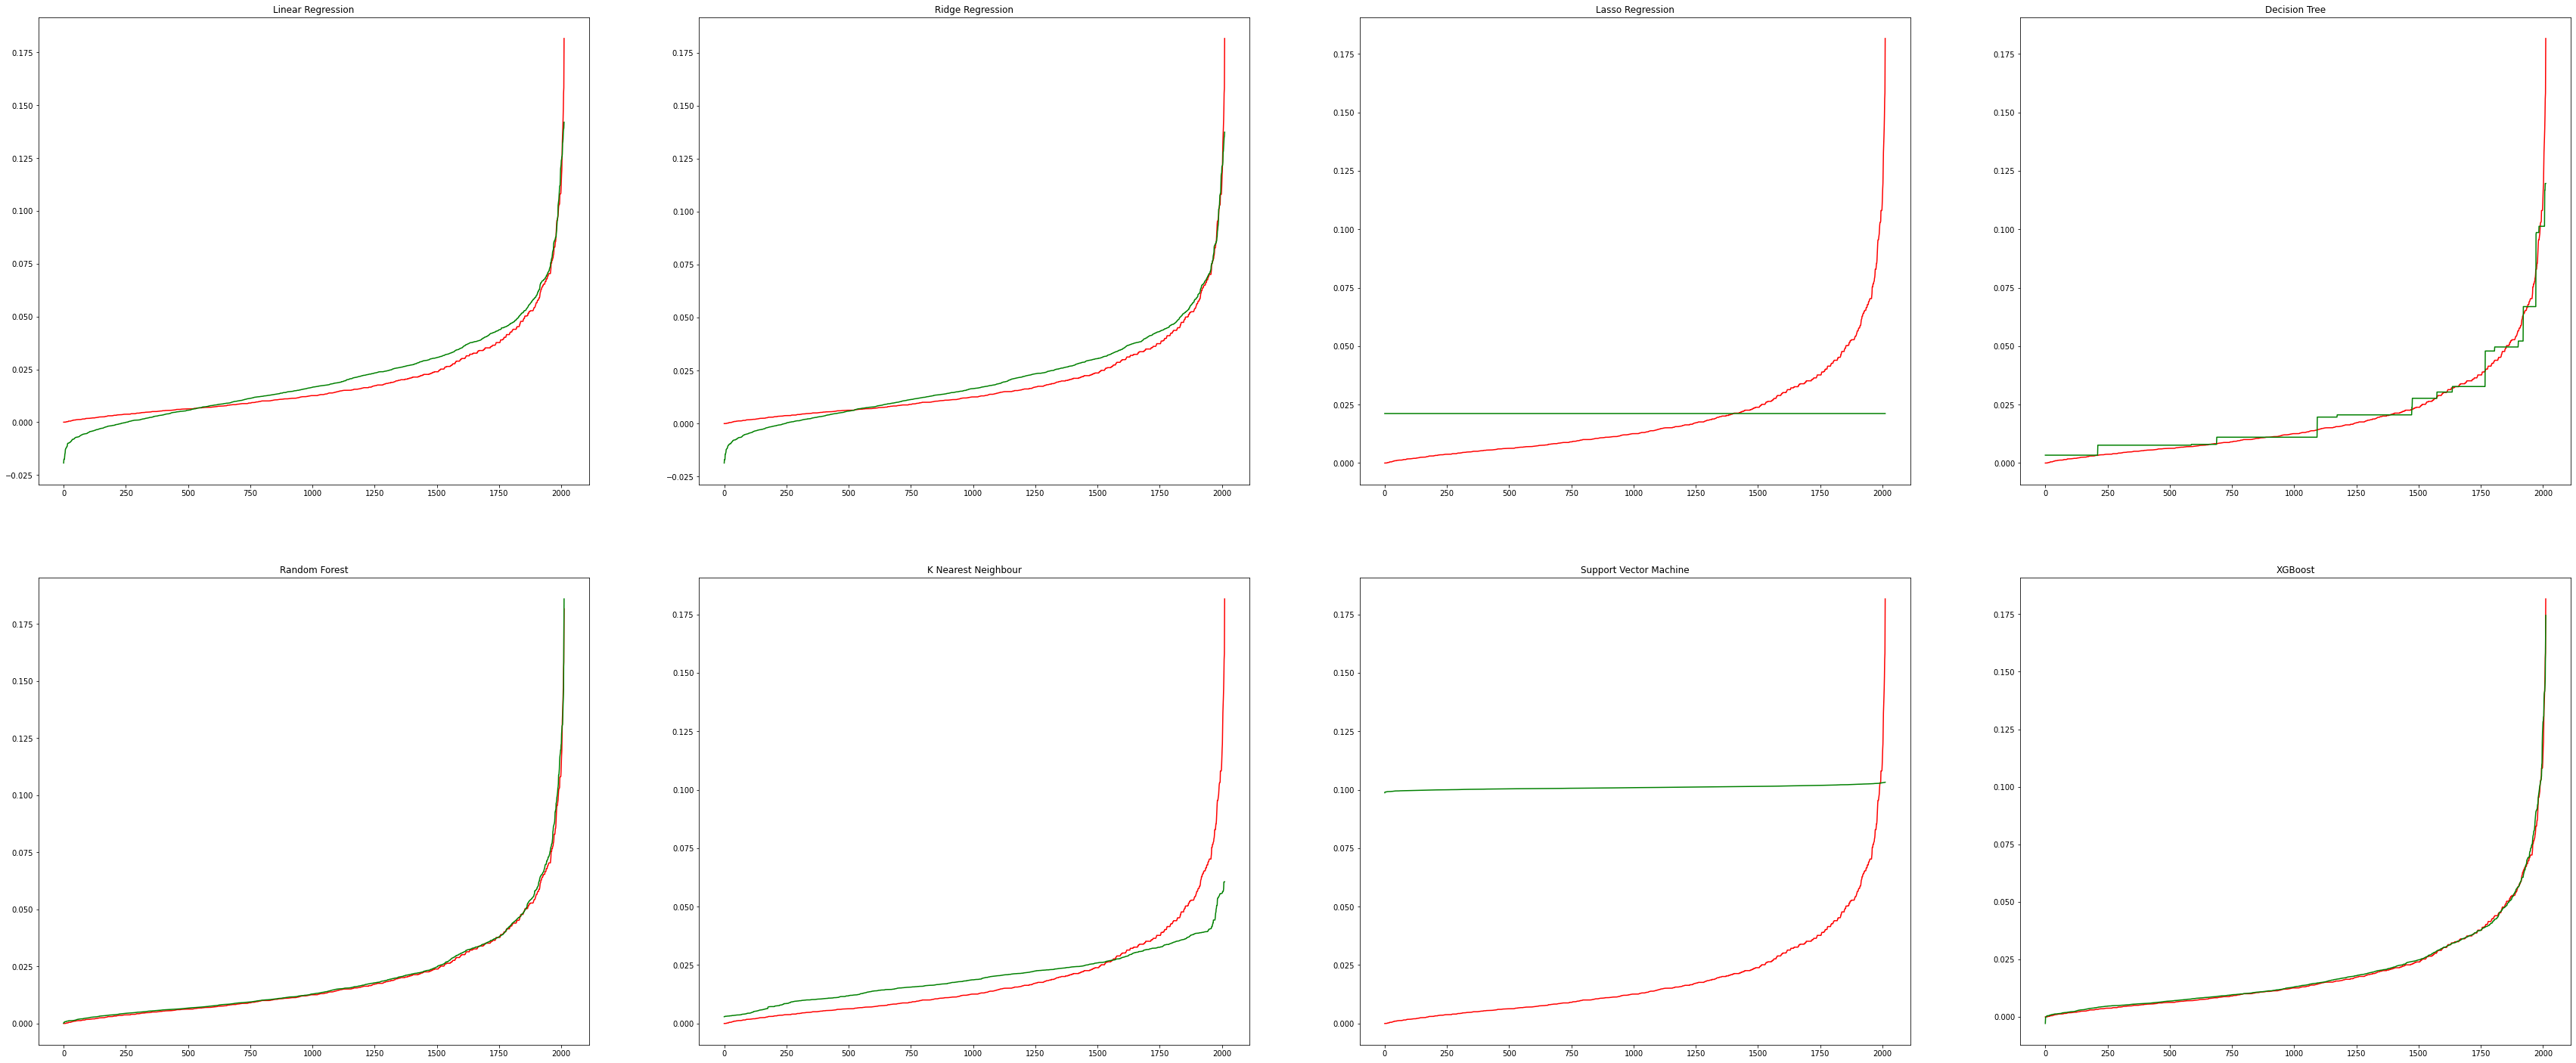

In [91]:
plt.figure(figsize=(60,25))

# Linear Regression
plt.subplot(2,4,1)
x = np.sort(y_test)[:-7]
y = np.sort(y_predict_LR)[:-7]
plt.title("Linear Regression")
plt.plot(x, label = "Actual", color="red")
plt.plot(y, label = "Pridected", color='green')

# Ridge Regression
plt.subplot(2,4,2)
x = np.sort(y_test)[:-7]
y = np.sort(y_predict_RR)[:-7]
plt.title("Ridge Regression")
plt.plot(x, label = "Actual", color="red")
plt.plot(y, label = "Pridected", color='green')

# Lasso Regression
plt.subplot(2,4,3)
x = np.sort(y_test)[:-7]
y = np.sort(y_predict_Lasso_R)[:-7]
plt.title("Lasso Regression")
plt.plot(x, label = "Actual", color="red")
plt.plot(y, label = "Pridected", color='green')

# Decision Tree
plt.subplot(2,4,4)
x = np.sort(y_test)[:-7]
y = np.sort(y_predict_DT)[:-7]
plt.title("Decision Tree")
plt.plot(x, label = "Actual", color="red")
plt.plot(y, label = "Pridected", color='green')

# Random Forest
plt.subplot(2,4,5)
x = np.sort(y_test)[:-7]
y = np.sort(y_predict_RF)[:-7]
plt.title("Random Forest")
plt.plot(x, label = "Actual", color="red")
plt.plot(y, label = "Pridected", color='green')

# K Nearest Neighbour
plt.subplot(2,4,6)
x = np.sort(y_test)[:-7]
y = np.sort(y_predict_KNR)[:-7]
plt.title("K Nearest Neighbour")
plt.plot(x, label = "Actual", color="red")
plt.plot(y, label = "Pridected", color='green')

# Support Vector Machine
plt.subplot(2,4,7)
x = np.sort(y_test)[:-7]
y = np.sort(y_predict_SVM)[:-7]
plt.title("Support Vector Machine")
plt.plot(x, label = "Actual", color="red")
plt.plot(y, label = "Pridected", color='green')

# XGBoost
plt.subplot(2,4,8)
x = np.sort(y_test)[:-7]
y = np.sort(y_predict_XGB)[:-7]
plt.title("XGBoost")
plt.plot(x, label = "Actual", color="red")
plt.plot(y, label = "Pridected", color='green')

# plt.savefig('../Results/All-Results', dpi=500, bbox_inches='tight')